In [ ]:
import pandas as pd
import numpy as np
import os

PATH = os.path.dirname(os.getcwd())
UNIVERSAL_OFFSET = -5


NEG_STRAND = ['SHLP1', 'SHLP2', 'SHLP3', 'SHLP4', 'SHLP5']



# Load the overlap data just for HS
org_df = pd.read_parquet(os.path.join(PATH, 'data', 'all_overlap.parquet')).dropna(subset = ['seq']).dropna(subset = ['seq'])
org_df = org_df[org_df['kingdom'] == 'Metazoa']

hs_row = org_df[org_df['species'] == 'Homo_sapiens'].iloc[0, :]
# Load Li's overlap annotations table
overlap_df = pd.read_csv(os.path.join(PATH, 'data', 'li_overlap_annotations', 'gene_overlap_positions.csv'))
overlap_df['Gene1'] = overlap_df['Gene1'].str.replace('MT-', '')
overlap_df['Gene2'] = overlap_df['Gene2'].str.replace('MT-', '')
# Add the offset to the overlap_df


overlap_df['overlap_name'] = overlap_df.apply(lambda x : f'{x[0]}_{x[1]}', axis = 1)
# Remove TER from the overlaps
overlap_df = overlap_df[overlap_df['Gene1'] != 'TER']
overlap_df = overlap_df[overlap_df['Gene2'] != 'TER']

co1_overlaps = []
rnr2_overlaps = []
rnr1_overlaps = []
nad4L_overlaps = []

atp8_overlaps = []
for _, row in overlap_df.iterrows():
    gene1 = row['Gene1']
    gene2 = row['Gene2']
    if gene1 == 'RNR2' or gene2 == 'RNR2':
        if gene1 == 'RNR2':
            name = gene2
        else:
            name = gene1
        if name not in NEG_STRAND:
            rnr2_overlaps.append([row['Overlap_Start'] + UNIVERSAL_OFFSET, row['Overlap_End'] + UNIVERSAL_OFFSET + 1, name])
        else:
            rnr2_overlaps.append([row['Overlap_Start'] + UNIVERSAL_OFFSET, row['Overlap_End'] + UNIVERSAL_OFFSET + 1, name])
    if gene1 == 'RNR1' or gene2 == 'RNR1':
        if gene1 == 'RNR1':
            name = gene2
        else:
            name = gene1
        rnr1_overlaps.append([row['Overlap_Start']+ UNIVERSAL_OFFSET, row['Overlap_End']+ UNIVERSAL_OFFSET + 1, name])
    if gene1 == 'CO1' or gene2 == 'CO1': 
        if gene1 == 'CO1':
            name = gene2
        else:
            name = gene1
        co1_overlaps.append([row['Overlap_Start']+ UNIVERSAL_OFFSET, row['Overlap_End']+ UNIVERSAL_OFFSET-1, name])
    if gene1 == 'MT-ALTND4' or gene2 == 'MT-ALTND4':
        if gene1 == 'MT-ALTND4':
            name = gene1
        else:
            name = gene2
        name = 'Overlap Region'
        co1_overlaps.append([row['Overlap_Start']+ UNIVERSAL_OFFSET, row['Overlap_End']+ UNIVERSAL_OFFSET-1, name])
    if gene1 == 'ND4L' or gene2 == 'ND4L':
        if gene1 == 'ND4L':
            name = gene2
        else:
            name = gene1
        name = 'Overlap Region'
        nad4L_overlaps.append([row['Overlap_Start']+ UNIVERSAL_OFFSET, row['Overlap_End']+ UNIVERSAL_OFFSET-1, name])
    
    if gene1 == 'ATP8' or gene2 == 'ATP8':
        if gene1 == 'ATP8':
            name = gene2
        else:
            name = gene1
        name = 'Overlap Region'
        atp8_overlaps.append([row['Overlap_Start']+ UNIVERSAL_OFFSET, row['Overlap_End']+ UNIVERSAL_OFFSET-1, name])
    
    if gene1 == 'CYB' or gene2 == 'CYB':
        if gene1 == 'CYB':
            name = gene2
        else:
            name = gene1
        name = 'Overlap Region'
        co1_overlaps.append([row['Overlap_Start']+ UNIVERSAL_OFFSET, row['Overlap_End']+ UNIVERSAL_OFFSET-1, name])

display(overlap_df)

C:\Users\shtolz\AppData\Local\Temp\ipykernel_34948\2962064075.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overlap_df['overlap_name'] = overlap_df.apply(lambda x : f'{x[0]}_{x[1]}', axis = 1)


,Gene1,Gene2,Overlap_Start,Overlap_End,overlap_name
0,HV2,OHR57,57,57,HV2_OHR57
1,HV2,OHR,110,372,HV2_OHR
2,HV2,CSB1,213,235,HV2_CSB1
3,HV2,TFX,233,260,HV2_TFX
4,HV2,TFY,276,303,HV2_TFY
5,HV2,CSB2,299,315,HV2_CSB2
6,HV2,HPR,317,321,HV2_HPR
7,HV2,CSB3,346,363,HV2_CSB3
8,HV2,4H,371,372,HV2_4H
9,OHR,CSB1,213,235,OHR_CSB1


In [2]:
rnr1_overlaps

[[1338, 1389, 'MOTSc']]

In [3]:
def extract_sequence(row, gene_start, gene_end):
    """
    Extract the sequence from the row based on the gene start and end positions.
    """
    seq = row['sequence']
    if pd.isna(seq):
        return ''
    gene_seq = seq[gene_start:gene_end]
    if gene_seq.endswith('T') or gene_seq.endswith('t'):
        while len(gene_seq)% 3 != 0:
            gene_seq += 'a'
    return gene_seq

In [19]:
# Path to the HS pop alignment file
fasta_path = os.path.join(PATH, 'data', 'hs_pop_seq', 'all_hs_aligned_to_rrcs_asm5_std_length.fasta')
hs_pop_df = utils.fasta_to_df(fasta_path)
# Load the genbank accession list and only keep hs_pop_df['ID'] in the accession_list.seq
with open(os.path.join(PATH, 'data', 'hs_pop_seq', 'genbank_ids.txt'), 'r') as f:
    genbank_ids = f.read().splitlines()
# Keep only accession and seq in hs_row
#hs_row_small = hs_row[['accession', 'seq']].rename({'seq' : 'sequence', 'accession' : 'ID'})
# Append hs_row to hs_pop_df
#hs_pop_df = hs_pop_df.append(hs_row_small, ignore_index = True)

# To make sure that all the gene coordinates represent the actual coordinates per mitochondrial genome, we first calculate the offset of the sequence length from the reference genome (16569) and then we add this offset to all the coordinates.
# This is done to make sure that the coordinates are correct for all the sequences in the alignment.
hs_pop_df['seq_len'] = hs_pop_df['sequence'].apply(lambda x : len(x))
hs_pop_df['organism'] = 'Homo_sapiens'
# Keep only ids that are in genbank_ids
#hs_pop_df = hs_pop_df[hs_pop_df['ID'].isin(genbank_ids)]
# Remove 1_std from the ID names
hs_pop_df['ID'] = hs_pop_df['ID'].str.replace('1_std', '')
hs_pop_df['ID'] = hs_pop_df['ID'].str.replace('.', '')
hs_pop_df['len_offset'] = hs_pop_df['seq_len'] - 16569
# Aligned offset
ALIGNED_OFFSET = int(hs_pop_df['len_offset'].mean(0)) + 1
gene_dict = {}
for i, gene in enumerate(hs_row['gene_order']):
    gene_loc = hs_row['gene_locations'][i].split(':')
    gene_start = int(gene_loc[0])
    gene_end = int(gene_loc[1])
    gene_strand = int(gene_loc[2])
    if gene not in ['RNR1', 'RNR2'] : 
        END_OFFSET =  0
    else:
        END_OFFSET = 0
    gene_dict[gene] = [gene_start + ALIGNED_OFFSET, gene_end + END_OFFSET , gene_strand]
    hs_pop_df[f'{gene}_seq'] = hs_pop_df.apply(extract_sequence, gene_start = gene_start, gene_end = gene_end, axis = 1)

hs_pop_df['atp8_atp6_seq'] = hs_pop_df['atp8_seq'] + hs_pop_df['atp6_seq']
hs_pop_df['nad4L_nad4_seq'] = hs_pop_df['nad4L_seq'] + hs_pop_df['nad4_seq']
# Make a fasta file for all sequences of RNR1, RNR2, cox1 and nad4
rnr1_seqs = hs_pop_df['RNR1_seq'].to_list()
rnr2_seqs = hs_pop_df['RNR2_seq'].to_list()
cox1_seqs = hs_pop_df['cox1_seq'].to_list()
nad4_seqs = hs_pop_df['nad4_seq'].to_list()
ids = hs_pop_df['ID'].to_list()
fasta_path = os.path.join(PATH, 'data', 'hs_pop_seq')
with open(os.path.join(fasta_path, 'rnr1_hs_pop.fasta'),'w') as rnr1_file:
    with open(os.path.join(fasta_path, 'rnr2_hs_pop.fasta'),'w') as rnr2_file:
        with open(os.path.join(fasta_path, 'cox1_hs_pop.fasta'),'w') as cox1_file:
            with open(os.path.join(fasta_path, 'nad4_hs_pop.fasta'),'w') as nad4_file:
                for i in range(len(rnr1_seqs)):
                    rnr1_file.write(f'>{ids[i]}\n{rnr1_seqs[i]}\n')
                    rnr2_file.write(f'>{ids[i]}\n{rnr2_seqs[i]}\n')
                    cox1_file.write(f'>{ids[i]}\n{cox1_seqs[i]}\n')
                    nad4_file.write(f'>{ids[i]}\n{nad4_seqs[i]}\n')

display(hs_pop_df.head(10))
# Save hs_pop_df and overlap_df to parquet files
hs_pop_df.to_parquet(os.path.join(PATH, 'data', 'hs_pop_df.parquet'))
overlap_df.to_parquet(os.path.join(PATH, 'data', 'overlap_df.parquet'))
display(len(hs_pop_df))

,ID,sequence,seq_len,organism,len_offset,TRNF_seq,RNR1_seq,TRNV_seq,RNR2_seq,TRNL1_seq,...,TRNS2_seq,TRNL2_seq,nad5_seq,nad6_seq,TRNE_seq,cob_seq,TRNT_seq,TRNP_seq,atp8_atp6_seq,nad4L_nad4_seq
0,PP1348631,GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCAT...,16569,Homo_sapiens,0,GTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAG...,AATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACA...,CAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGATT...,GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...,TAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTACAG...,...,GAAAGCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACAACA...,TTTTAAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAATTT...,AACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAATT...,TATTCCCCCGAGCAATCTCAATTACAATATATACACCAACAAACAA...,TTCTCGCACGGACTACAACCACGACCAATGATATGAAAAACCATCG...,GACCCCAATACGCAAAATTAACCCCCTAATAAAACTAATTAACCAC...,CCTTGTAGTATAAACTAATACACCAGTCTTGTAAACCGGAGATGAA...,AGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGATT...,GCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATA...,GCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCACTT...
1,PV0673941,NATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCAT...,16569,Homo_sapiens,0,AGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTA...,AAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTAC...,CCAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGAT...,AGCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACC...,TTAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTACA...,...,GCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACAACATGGC...,AAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAATTTTGGT...,ATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAATTCCCC...,CCCCCGAGCAATCTCAATTACAATATATACACCAACAAACAATGTT...,CGCACGGACTACAACCACGACCAATGATATGAAAAACCATCGTTGT...,CCAATACGCAAAATTAACCCCCTAATAAAACTAATTAACCACTCAT...,GTAGTATAAACTAATACACCAGTCTTGTAAACCGGAGATGAAAACC...,AAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGATTCTAA...,CAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCC...,CTCATTTACATAAATATTATACTAGCATTTACCATCTCACTTCTAG...
2,PV0673931,GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCAT...,16569,Homo_sapiens,0,CAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTT...,CAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTA...,ACCAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGA...,GAGCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAAC...,TGTTAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTA...,...,CGAGAAAGCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACA...,AACTTTTAAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAA...,AATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTA...,ACCTATTCCCCCGAGCAATCTCAATTACAATATATACACCAACAAA...,TTATTCTCGCACGGACTACAACCACGACCAATGATATGAAAAACCA...,AATGACCCCAATACGCAAAATTAACCCCCTAATAAAACTAATTAAC...,TGTCCTTGTAGTATAAACTAATACACCAGTCTTGTAAACCGGAGAT...,ATCAGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAG...,AATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCC...,AATGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCA...
3,PV0673921,GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCAT...,16569,Homo_sapiens,0,GTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAG...,AATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACA...,CAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGATT...,GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...,TTAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTACA...,...,AGAAAGCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACAAC...,CTTTTAAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAATT...,TAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAAT...,CTATTCCCCCGAGCAATCTCAATTACAATATATACACCAACAAACA...,ATTCTCGCACGGACTACAACCACGACCAATGATATGAAAAACCATC...,TGACCCCAATACGCAAAATTAACCCCCTAATAAAATTAATTAACCA...,TCCTTGTAGTATAAACTAATACACCAGTCTTGTAAACCGGAGATGA...,CAGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGAT...,TGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCAT...,TGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCACT...
4,PV0673911,GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCAT...,16569,Homo_sapiens,0,GTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAG...,AATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACA...,CAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGATT...,GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...,TTAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTACA...,...,AGAAAGCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACAAC...,CTTTTAAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAATT...,TAACCATGCACACTACTATAAC

66328

In [20]:
hs_pop_df.sample(10)[['ID','cox1_seq']]


,ID,cox1_seq
43549,HM8528031,TGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGG...
31483,KY4094681,TATTCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATT...
41772,DQ2721101,GATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATT...
48819,KP7638351,ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...
49315,KM1020721,ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...
56700,KF1485821,TGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGG...
29351,MF4975011,TGATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACAT...
8400,OL6386191,ACTGATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGAC...
45203,FJ7709621,ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...
65474,AP0107561,TGATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACAT...


In [21]:
row = hs_pop_df.iloc[0, :]
gene_start = 8527 + ALIGNED_OFFSET -1
gene_end = 9207 + UNIVERSAL_OFFSET

extract_sequence(row, gene_start, gene_end).upper()

'AACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAGCCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCGCAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACA'

In [33]:
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1']

In [22]:
hs_pop_df['cox1_seq']

0        GTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGGA...
1        GCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGGAACAC...
2        GATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATT...
3        TGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGG...
4        TGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGG...
                               ...                        
66323    GATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATT...
66324    ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...
66325    TTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGGAA...
66326    GATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATT...
66327    GTCCTACTTCTCCTATCTCTCCCAGTCCTAGCTGCTGGCATCACTA...
Name: cox1_seq, Length: 66328, dtype: object

Loaded 66328 sequences from 66328 rows
Removed 0


c:\Users\shtolz\Desktop\multi_function_review\bin\sequence_conservation_analysis.py:307: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


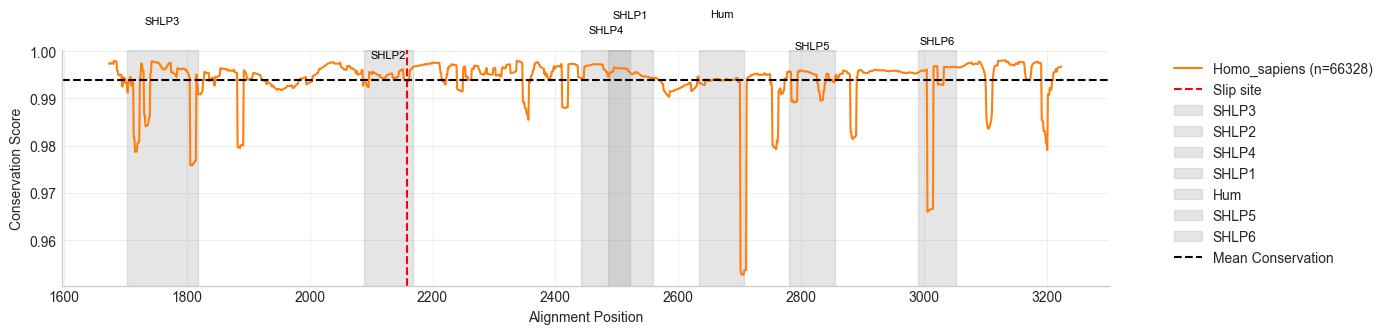

In [35]:
reload(scova)

rnr2_cons_profile = scova.run_conservation_analysis(hs_pop_df, seq_col='RNR2_seq', mark_regions=rnr2_overlaps, phylum_col='organism',  figsize=(14, 3.5), out_fig_path=os.path.join(PATH, 'figures', 'conservation_analysis_rnr2.png'), add_mean_line = True, window_size=10, start_pos = gene_dict['RNR2'][0], color = 'tab:orange', slip_site_pos = 2158)

Loaded 66328 sequences from 66328 rows
Removed 0


c:\Users\shtolz\Desktop\multi_function_review\bin\sequence_conservation_analysis.py:307: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


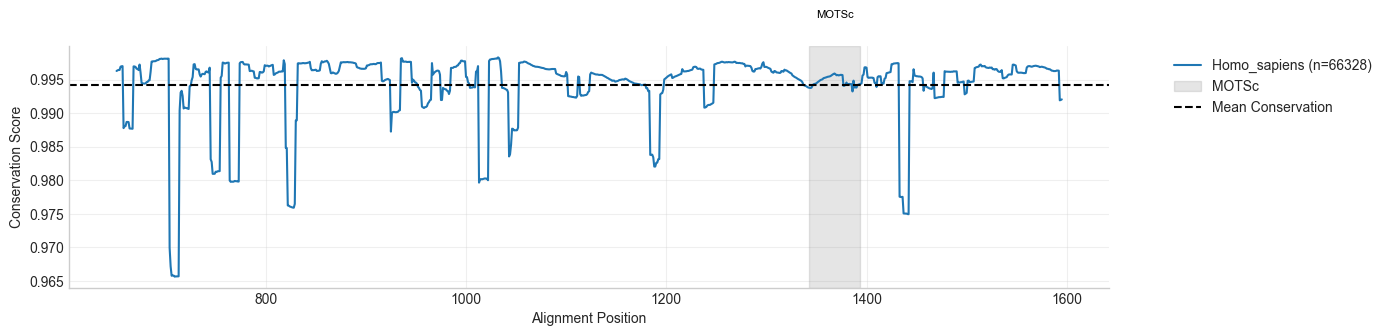

In [36]:
reload(scova)

rnr1_cons_profile = scova.run_conservation_analysis(hs_pop_df, seq_col='RNR1_seq', mark_regions=rnr1_overlaps, phylum_col='organism',  figsize=(14, 3.5), out_fig_path=os.path.join(PATH, 'figures', 'conservation_analysis_rnr1.png'), add_mean_line = True, window_size=10, start_pos = gene_dict['RNR1'][0], color = 'tab:blue')

Loaded 66328 sequences from 66328 rows
Removed 0


c:\Users\shtolz\Desktop\multi_function_review\bin\sequence_conservation_analysis.py:307: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


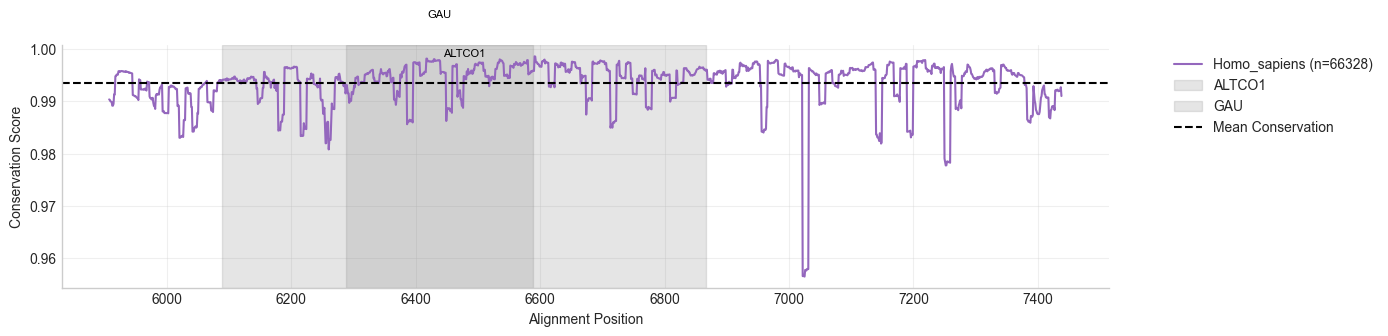

In [37]:
reload(scova)

co1_cons_profile = scova.run_conservation_analysis(hs_pop_df, seq_col='cox1_seq', mark_regions=co1_overlaps, phylum_col='organism',  figsize=(14, 3.5), out_fig_path=os.path.join(PATH, 'figures', 'conservation_analysis_co1.png'), add_mean_line = True, window_size=10, start_pos = gene_dict['cox1'][0], color = 'tab:purple')

Loaded 66328 sequences from 66328 rows
Removed 0


c:\Users\shtolz\Desktop\multi_function_review\bin\sequence_conservation_analysis.py:307: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


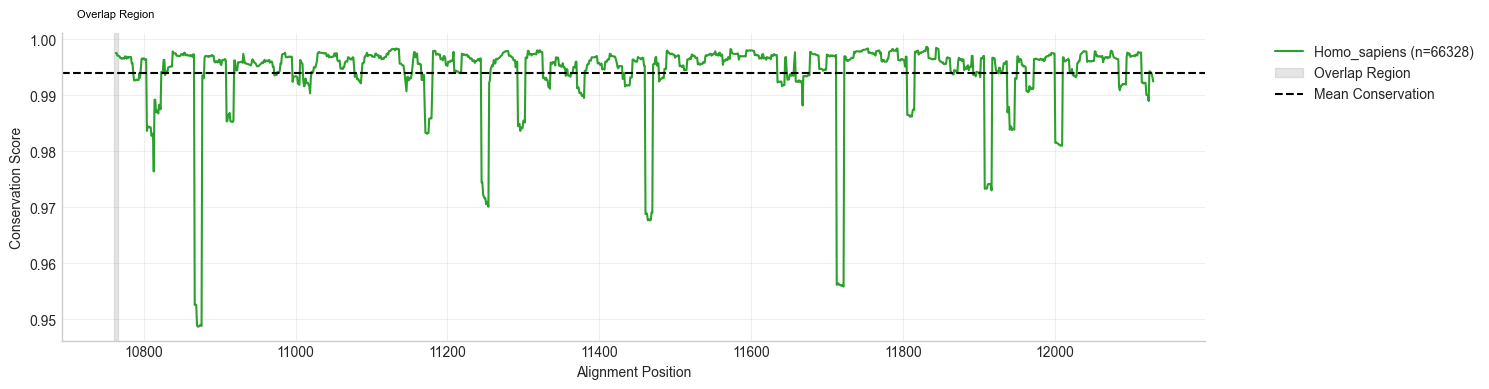

In [38]:
reload(scova)

nd4_cons_profile = scova.run_conservation_analysis(hs_pop_df, seq_col='nad4_seq', mark_regions=nad4L_overlaps, phylum_col='organism',  figsize=(15, 4), out_fig_path=os.path.join(PATH, 'figures', 'conservation_analysis_nd4.png'), add_mean_line = True, window_size=10, start_pos = gene_dict['nad4'][0], color = 'tab:green')

In [39]:
# Grab just the conservation scores for each position
seq_conv_rnr2 = pd.DataFrame(columns = ['Position', 'Overlap Region', 'Score'])
temp_lists = [[], [], []]
for pos, score in enumerate(rnr2_cons_profile['conservation_results']['Homo_sapiens']['scores']):
    cur_pos = pos + gene_dict['RNR2'][0]
    temp_lists[0].append(cur_pos)
    temp_lists[2].append(score)
    for overlap_region in rnr2_overlaps:
        start = overlap_region[0]
        end = overlap_region[1]
        name = overlap_region[-1]
        if start <= cur_pos <= end:
            temp_lists[1].append(name)
            break
        if name == rnr2_overlaps[-1][-1]:
            temp_lists[1].append('Non-overlap Region')
            break
seq_conv_rnr2['Position'] = temp_lists[0]
seq_conv_rnr2['Overlap Region'] = temp_lists[1]
seq_conv_rnr2['Score'] = temp_lists[2]


# Grab just the conservation scores for each position
seq_conv_rnr1 = pd.DataFrame(columns = ['Position', 'Overlap Region', 'Score'])
temp_lists = [[], [], []]
for pos, score in enumerate(rnr1_cons_profile['conservation_results']['Homo_sapiens']['scores']):
    cur_pos = pos + gene_dict['RNR1'][0]
    temp_lists[0].append(cur_pos)
    temp_lists[2].append(score)
    for overlap_region in rnr1_overlaps:
        start = overlap_region[0]
        end = overlap_region[1]
        name = overlap_region[-1]
        if start <= cur_pos <= end:
            temp_lists[1].append(name)
            break
        if name == rnr1_overlaps[-1][-1]:
            temp_lists[1].append('Non-overlap Region')
            break
seq_conv_rnr1['Position'] = temp_lists[0]
seq_conv_rnr1['Overlap Region'] = temp_lists[1]
seq_conv_rnr1['Score'] = temp_lists[2]


In [40]:
rnr2_overlaps

[[1703, 1819, 'SHLP3'],
 [2088, 2168, 'SHLP2'],
 [2442, 2522, 'SHLP4'],
 [2485, 2559, 'SHLP1'],
 [2633, 2707, 'Hum'],
 [2780, 2854, 'SHLP5'],
 [2990, 3052, 'SHLP6']]

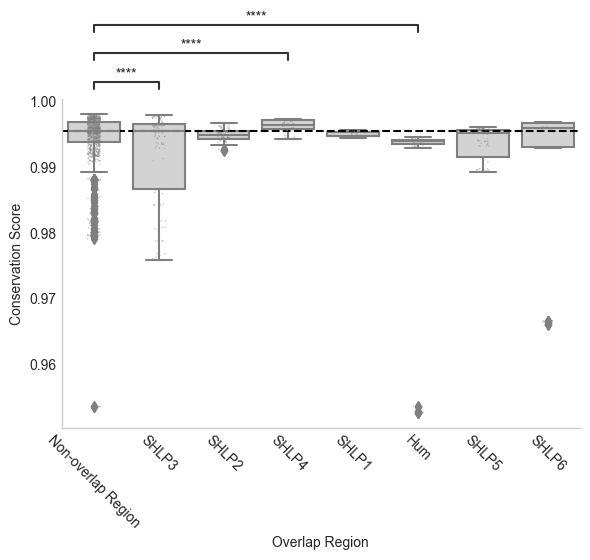

In [41]:

# Plot the conservation scores for each class
_, ax = plt.subplots(figsize = (6, 6))
sns.boxplot(ax = ax, data=seq_conv_rnr2, x='Overlap Region', y='Score', palette=['lightgrey'])
# Add stripplot
sns.stripplot(ax = ax, data=seq_conv_rnr2, x='Overlap Region', y='Score', size = 1, alpha = 0.5, palette = ['Grey'], dodge = False)

pairs = [
    (i[-1] , 'Non-overlap Region') for i in rnr2_overlaps[:-1]
]
# Add a line around the mean of non-overlap region
mean = seq_conv_rnr2[seq_conv_rnr2['Overlap Region'] == 'Non-overlap Region']['Score'].median()
ax.axhline(mean, color='black', linestyle='--')
annotator = Annotator(ax, pairs, data=seq_conv_rnr2, x='Overlap Region', y='Score')
annotator.configure(test='t-test_ind', text_format='star', loc='outside', verbose=0, hide_non_significant=True)
annotator.apply_and_annotate()
#ax.set_title('Conservation Scores for Each Overlap Region')
ax.set_xlabel('Overlap Region')
ax.set_ylabel('Conservation Score')
# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
# Move legend outside of the plot
#ax.legend(title='Overlap Region', loc='upper left', bbox_to_anchor=(1, 1))
# Add stat annotations
# Remove grid
ax.grid(False)
# Remove top and right spines

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()  
#Savefig
plt.savefig(os.path.join(PATH, 'figures', 'conservation_scores_overlap_region.png'), dpi = 300)


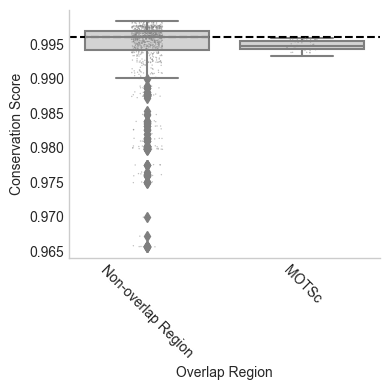

In [42]:

# Plot the conservation scores for each class
_, ax = plt.subplots(figsize = (4, 4))
sns.boxplot(ax = ax, data=seq_conv_rnr1, x='Overlap Region', y='Score', palette=['lightgrey'])
# Add stripplot
sns.stripplot(ax = ax, data=seq_conv_rnr1, x='Overlap Region', y='Score', size = 1, alpha = 0.5, palette = ['Grey'], dodge = False)

pairs = [
    (i[-1] , 'Non-overlap Region') for i in rnr1_overlaps
]
# Add a line around the mean of non-overlap region
mean = seq_conv_rnr1[seq_conv_rnr1['Overlap Region'] == 'Non-overlap Region']['Score'].median()
ax.axhline(mean, color='black', linestyle='--')
annotator = Annotator(ax, pairs, data=seq_conv_rnr1, x='Overlap Region', y='Score')
annotator.configure(test='t-test_ind', text_format='star', loc='outside', verbose=0, hide_non_significant=True)
annotator.apply_and_annotate()
#ax.set_title('Conservation Scores for Each Overlap Region')
ax.set_xlabel('Overlap Region')
ax.set_ylabel('Conservation Score')
# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
# Move legend outside of the plot
#ax.legend(title='Overlap Region', loc='upper left', bbox_to_anchor=(1, 1))
# Add stat annotations
# Remove grid
ax.grid(False)
# Remove top and right spines

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()  
#Savefig
plt.savefig(os.path.join(PATH, 'figures', 'conservation_scores_overlap_region_rnr1.png'), dpi = 300)


2025-05-25 14:15:06,587 - INFO - Starting analysis for gene RNR2_seq with 7 micro-protein regions
2025-05-25 14:15:06,589 - INFO - Gene starts at mtDNA position 1665
2025-05-25 14:15:06,589 - INFO - Starting conservation analysis for RNR2_seq
2025-05-25 14:15:06,590 - INFO - Dataset contains 66328 samples
2025-05-25 14:15:06,590 - INFO - Analyzing 7 micro-protein regions
2025-05-25 14:15:06,591 - INFO - Conservation metric: entropy
2025-05-25 14:15:06,593 - INFO - Extracted 66328 sequences
2025-05-25 14:15:06,603 - INFO - Sequence lengths - min: 1559, max: 1559
2025-05-25 14:15:06,605 - INFO - Calculating conservation per position
2025-05-25 14:15:06,605 - INFO - Progress: 0/1559 positions (0.0%)
2025-05-25 14:15:07,003 - INFO - Progress: 77/1559 positions (4.9%)
2025-05-25 14:15:07,437 - INFO - Progress: 154/1559 positions (9.9%)
2025-05-25 14:15:07,858 - INFO - Progress: 231/1559 positions (14.8%)
2025-05-25 14:15:08,276 - INFO - Progress: 308/1559 positions (19.8%)
2025-05-25 14:15:

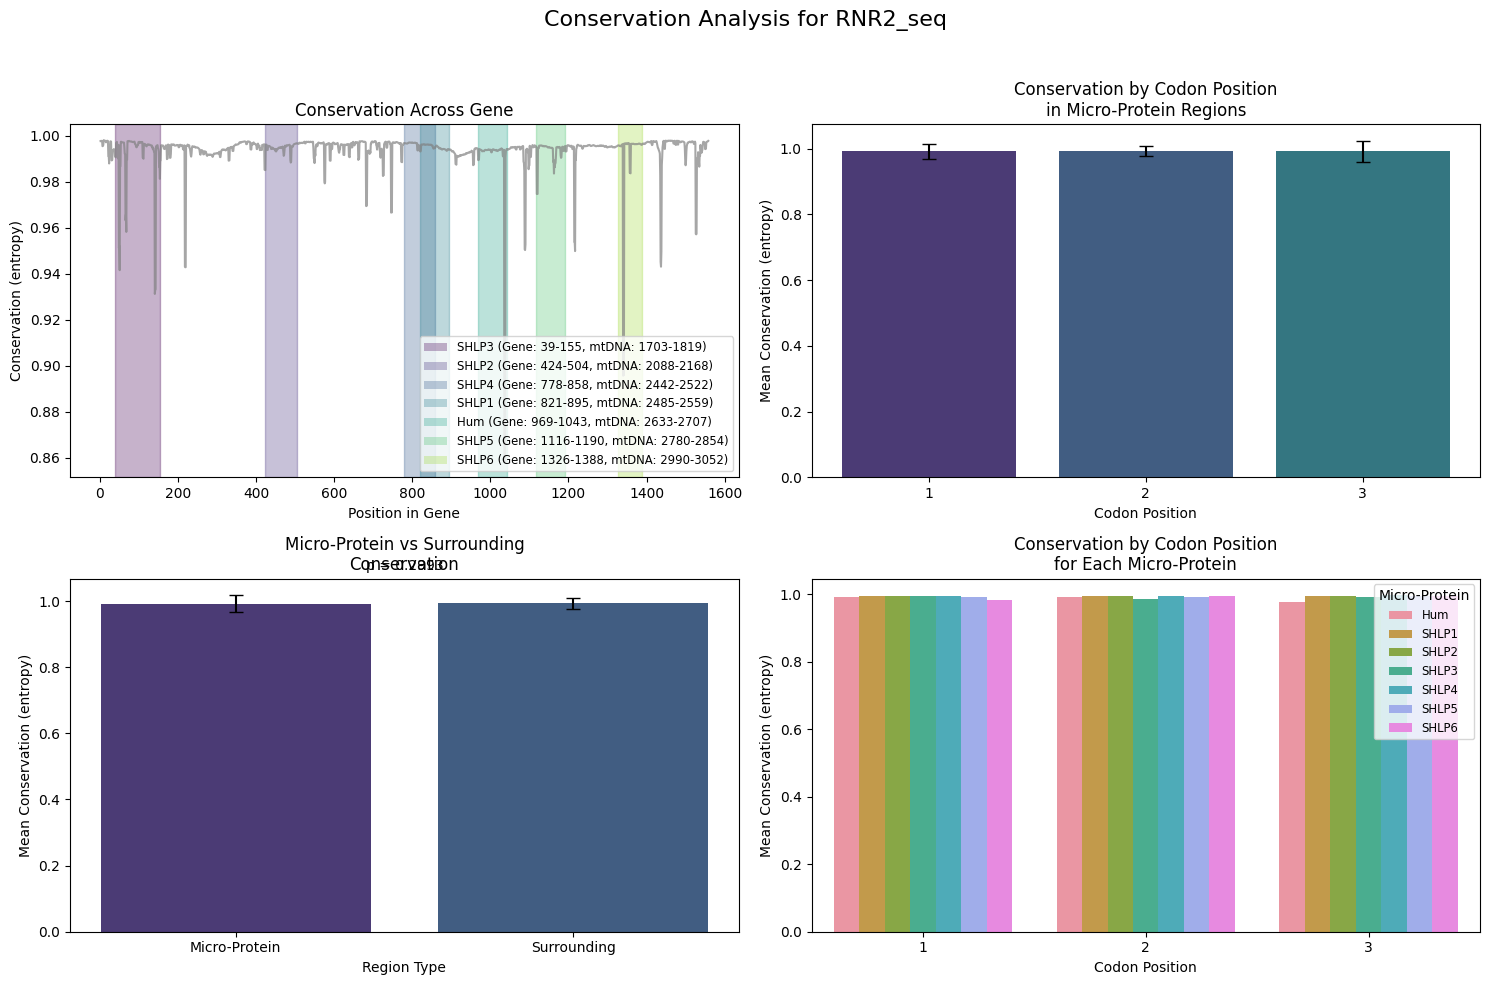

2025-05-25 14:15:16,096 - INFO - Analysis complete in 9.51 seconds
2025-05-25 14:15:16,097 - INFO - Saving results with prefix results
2025-05-25 14:15:16,121 - INFO - Analysis for gene RNR2_seq complete


In [43]:

reload(pcc)
results = pcc.analyze_mtdna_conservation(
    df=hs_pop_df,                        # DataFrame with sequences
    gene_column='RNR2_seq',                       # Column name with gene sequences
    micro_protein_regions=rnr2_overlaps,  # Micro-protein coordinates
    window_size=3,                            # For smoothing conservation scores
    surrounding_margin=100,                   # Base pairs to include around micro-proteins
    output_prefix='results',                  # Prefix for output files
    plot=True,                                 # Generate visualizations
    conservation_metric = 'entropy',                       # Metric to use for conservation
    start_pos = gene_dict['RNR2'][0],
    outdir = os.path.join(PATH, 'data', 'codon_conservation')
)

In [44]:
gene_dict['cox1'][0]

5898

2025-05-25 14:15:16,142 - INFO - Starting analysis for gene cox1_seq with 2 micro-protein regions
2025-05-25 14:15:16,143 - INFO - Gene starts at mtDNA position 5898
2025-05-25 14:15:16,144 - INFO - Starting conservation analysis for cox1_seq
2025-05-25 14:15:16,144 - INFO - Dataset contains 66328 samples
2025-05-25 14:15:16,145 - INFO - Analyzing 2 micro-protein regions
2025-05-25 14:15:16,145 - INFO - Conservation metric: entropy
2025-05-25 14:15:16,146 - INFO - Extracted 66328 sequences
2025-05-25 14:15:16,155 - INFO - Sequence lengths - min: 1541, max: 1541
2025-05-25 14:15:16,156 - INFO - Calculating conservation per position
2025-05-25 14:15:16,157 - INFO - Progress: 0/1541 positions (0.0%)
2025-05-25 14:15:16,544 - INFO - Progress: 77/1541 positions (5.0%)
2025-05-25 14:15:16,884 - INFO - Progress: 154/1541 positions (10.0%)
2025-05-25 14:15:17,244 - INFO - Progress: 231/1541 positions (15.0%)
2025-05-25 14:15:17,608 - INFO - Progress: 308/1541 positions (20.0%)
2025-05-25 14:15

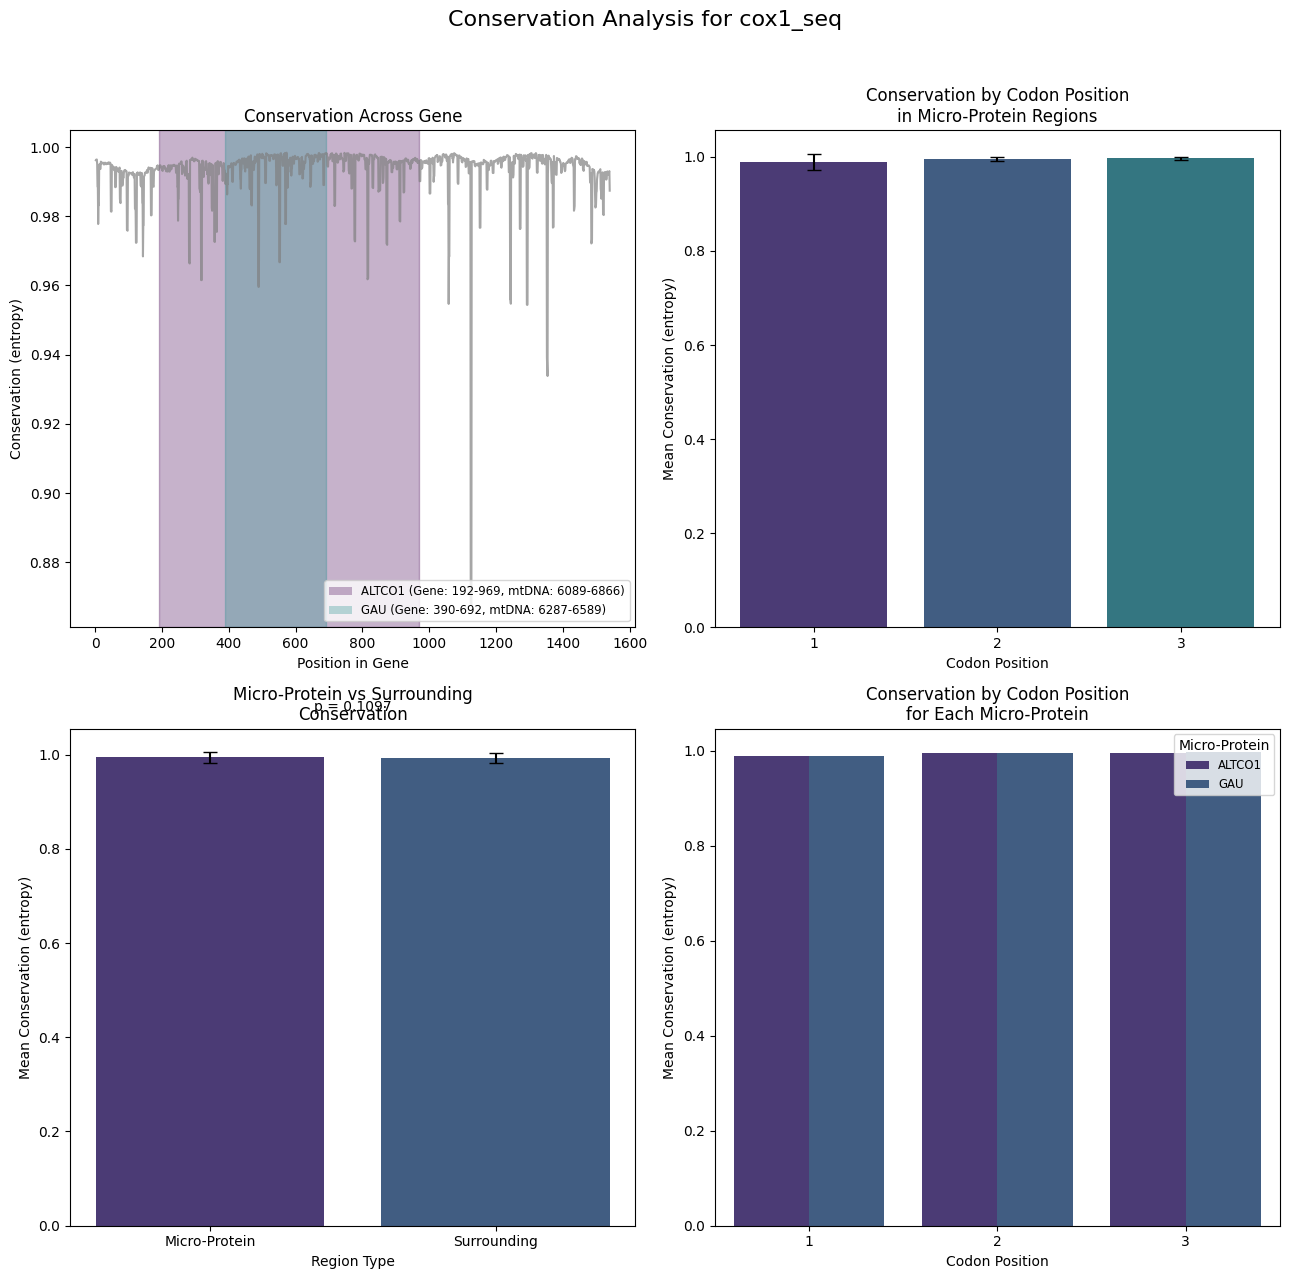

2025-05-25 14:15:28,508 - INFO - Analysis complete in 12.36 seconds
2025-05-25 14:15:28,510 - INFO - Saving results with prefix results
2025-05-25 14:15:28,522 - INFO - Analysis for gene cox1_seq complete


In [45]:
reload(pcc)
results = pcc.analyze_mtdna_conservation(
    df=hs_pop_df,                        # DataFrame with sequences
    gene_column='cox1_seq',                       # Column name with gene sequences
    micro_protein_regions=co1_overlaps,  # Micro-protein coordinates
    window_size=3,                            # For smoothing conservation scores
    surrounding_margin=100,                   # Base pairs to include around micro-proteins
    output_prefix='results',                  # Prefix for output files
    plot=True,                                 # Generate visualizations
    conservation_metric = 'entropy',                       # Metric to use for conservation
    start_pos = gene_dict['cox1'][0],
    figsize = (13, 13),
    outdir = os.path.join(PATH, 'data', 'codon_conservation')
)

2025-05-25 14:15:28,532 - INFO - Starting analysis for gene nad4_seq with 1 micro-protein regions
2025-05-25 14:15:28,533 - INFO - Gene starts at mtDNA position 10754
2025-05-25 14:15:28,534 - INFO - Starting conservation analysis for nad4_seq
2025-05-25 14:15:28,534 - INFO - Dataset contains 66328 samples
2025-05-25 14:15:28,535 - INFO - Analyzing 1 micro-protein regions
2025-05-25 14:15:28,536 - INFO - Conservation metric: entropy
2025-05-25 14:15:28,538 - INFO - Extracted 66328 sequences
2025-05-25 14:15:28,553 - INFO - Sequence lengths - min: 1377, max: 1377
2025-05-25 14:15:28,555 - INFO - Calculating conservation per position
2025-05-25 14:15:28,556 - INFO - Progress: 0/1377 positions (0.0%)
2025-05-25 14:15:28,890 - INFO - Progress: 68/1377 positions (4.9%)
2025-05-25 14:15:29,207 - INFO - Progress: 136/1377 positions (9.9%)
2025-05-25 14:15:29,601 - INFO - Progress: 204/1377 positions (14.8%)
2025-05-25 14:15:29,954 - INFO - Progress: 272/1377 positions (19.8%)
2025-05-25 14:15

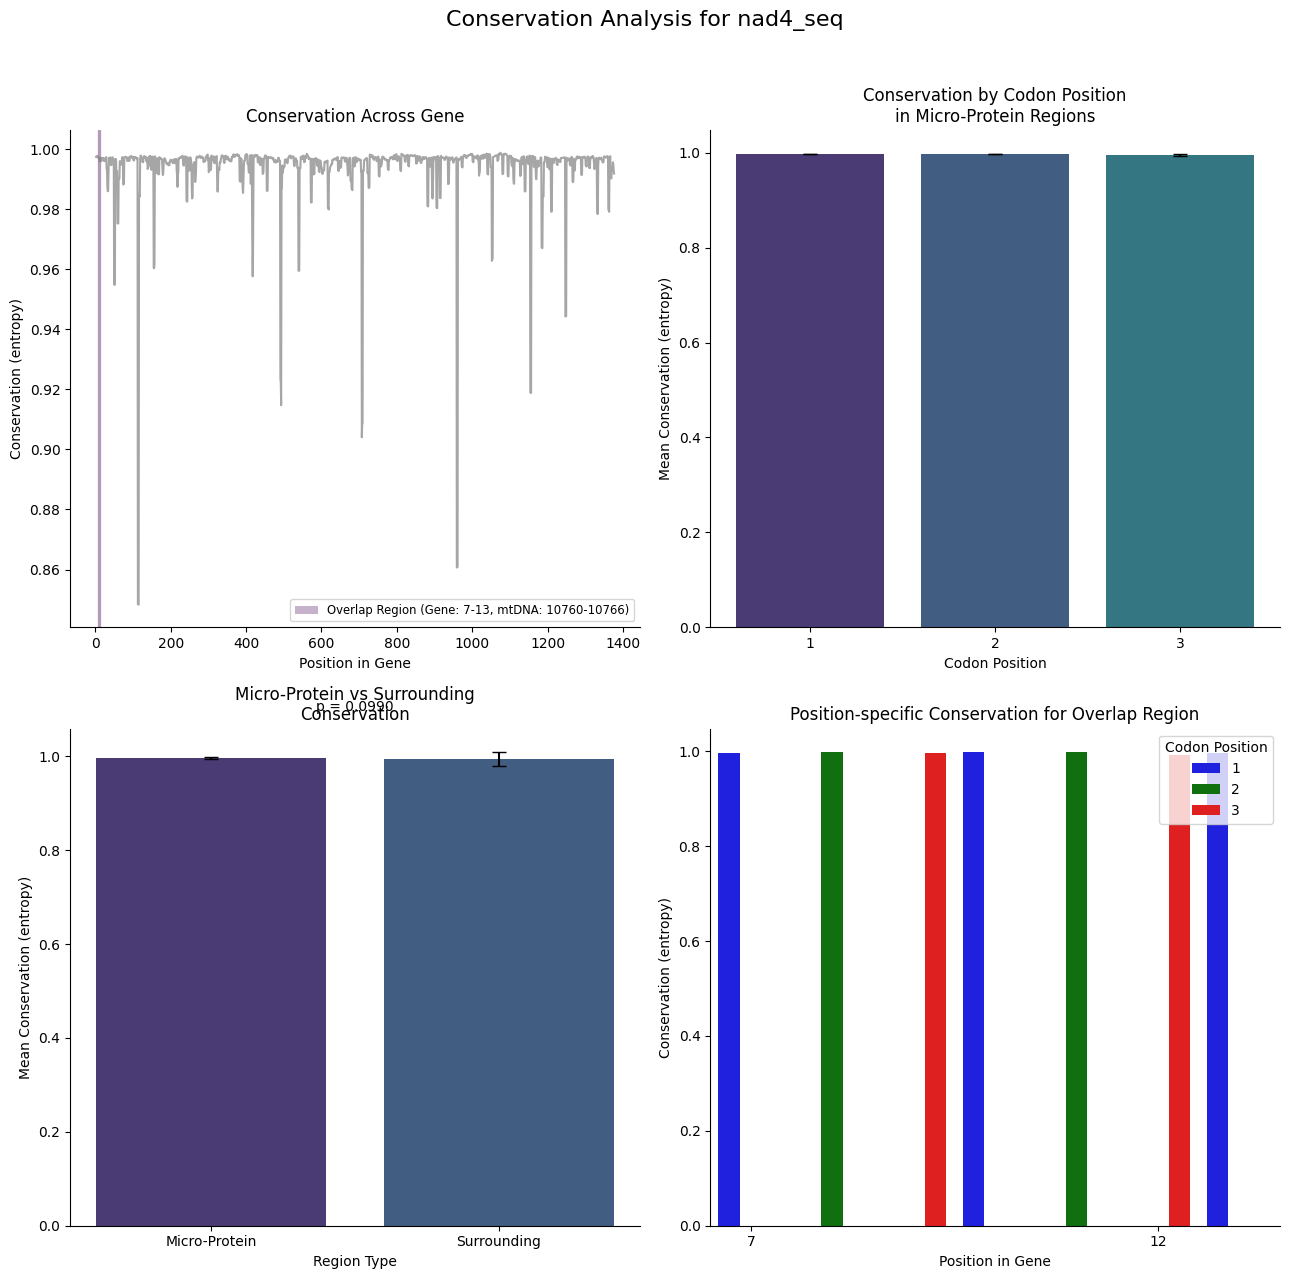

2025-05-25 14:15:36,988 - INFO - Analysis complete in 8.45 seconds
2025-05-25 14:15:36,990 - INFO - Saving results with prefix results
2025-05-25 14:15:37,009 - INFO - Analysis for gene nad4_seq complete


In [46]:
reload(pcc)
results = pcc.analyze_mtdna_conservation(
    df=hs_pop_df,                        # DataFrame with sequences
    gene_column='nad4_seq',                       # Column name with gene sequences
    micro_protein_regions=nad4L_overlaps,  # Micro-protein coordinates
    window_size=3,                            # For smoothing conservation scores
    surrounding_margin=100,                   # Base pairs to include around micro-proteins
    output_prefix='results',                  # Prefix for output files
    plot=True,                                 # Generate visualizations
    conservation_metric = 'entropy',                       # Metric to use for conservation
    start_pos = gene_dict['nad4'][0],
    figsize = (13, 13),
    outdir = os.path.join(PATH, 'data', 'codon_conservation')
)

2025-05-25 14:15:37,022 - INFO - Starting analysis for RNR1 with 1 micro-proteins
2025-05-25 14:15:37,023 - INFO - Using start position 642 for coordinate conversion
2025-05-25 14:15:37,024 - INFO - Using polymorphism threshold of 1.00%
2025-05-25 14:15:37,024 - INFO - Using sequence column: RNR1_seq
2025-05-25 14:15:37,025 - INFO - Gene length: 954 nucleotides
2025-05-25 14:15:37,025 - INFO - Identified 51 positions in micro-proteins and 903 positions in non-coding rRNA regions
2025-05-25 14:15:37,026 - INFO - Generating consensus sequence as reference
2025-05-25 14:15:44,457 - INFO - Generated consensus sequence of length 954
2025-05-25 14:15:44,457 - INFO - Calculating nucleotide diversity and polymorphism metrics
2025-05-25 14:15:51,747 - INFO - Calculating metrics using sliding window of size 10
2025-05-25 14:15:51,753 - INFO -   Mean minor allele frequency: 0.0009
2025-05-25 14:15:51,755 - INFO -   Flanking rRNA mean minor allele frequency: 0.0015
2025-05-25 14:15:51,756 - INFO -

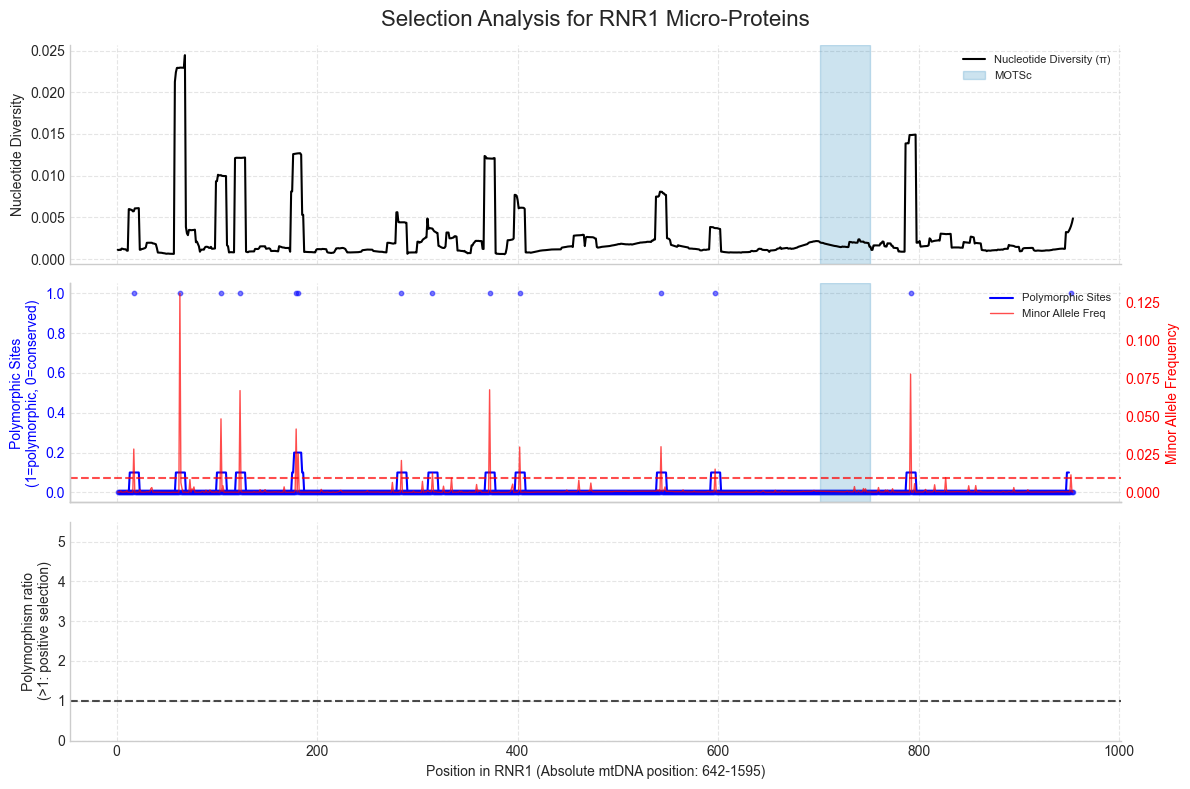

In [47]:
reload(mosa)
# Load your sequence data into a DataFrame
# df_rnr1 should contain the full sequences for the RNR1 gene across mtDNAs
col = 'RNR1_seq'
# Define micro-protein coordinates (1-indexed positions)
rnr1_coords = [[1343, 1393, 'MOTSc']]
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1'][col].iloc[0]
# Run analysis
results_rnr1 = mosa.calculate_mk_metrics(
    df=hs_pop_df,
    gene_name='RNR1',
    sequence_col = col,
    micro_protein_coords=rnr1_overlaps,
    window_size=10,
    flank_size=50,
    plot=True,
    output_file=os.path.join(PATH, 'figures', 'RNR1_selection_analysis.png'),
    start_pos=gene_dict['RNR1'][0],
    polymorphism_threshold = 0.01,
    figsize = (12, 8),
    legend_inside = True
)

2025-05-25 14:15:52,563 - INFO - Starting analysis for RNR2 with 7 micro-proteins
2025-05-25 14:15:52,564 - INFO - Using start position 1665 for coordinate conversion
2025-05-25 14:15:52,564 - INFO - Using polymorphism threshold of 1.00%
2025-05-25 14:15:52,565 - INFO - Using sequence column: RNR2_seq
2025-05-25 14:15:52,565 - INFO - Gene length: 1559 nucleotides
2025-05-25 14:15:52,568 - INFO - Identified 567 positions in micro-proteins and 1030 positions in non-coding rRNA regions
2025-05-25 14:15:52,569 - INFO - Generating consensus sequence as reference
2025-05-25 14:16:04,846 - INFO - Generated consensus sequence of length 1559
2025-05-25 14:16:04,847 - INFO - Calculating nucleotide diversity and polymorphism metrics
2025-05-25 14:16:21,279 - INFO - Calculating metrics using sliding window of size 10
2025-05-25 14:16:21,293 - INFO -   Mean minor allele frequency: 0.0021
2025-05-25 14:16:21,297 - INFO -   Flanking rRNA mean minor allele frequency: 0.0012
2025-05-25 14:16:21,299 - I

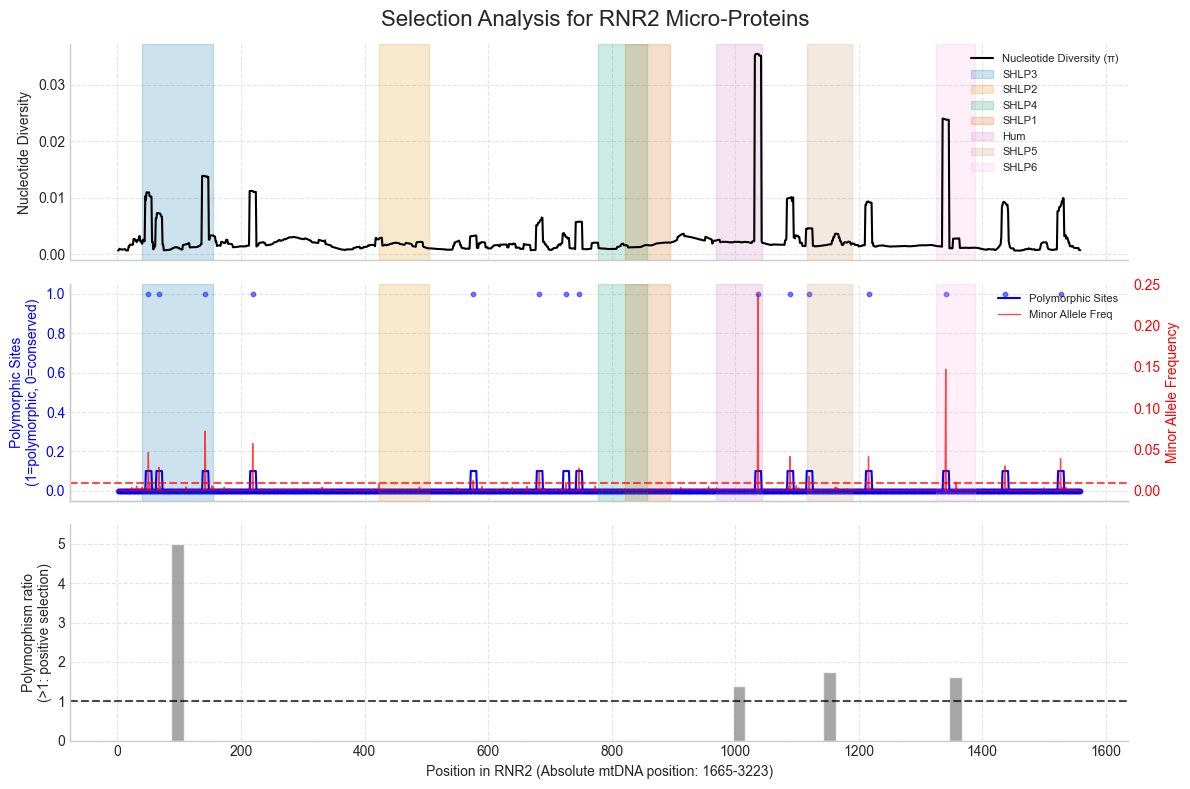

In [48]:
reload(mosa)
# Load your sequence data into a DataFrame
# df_rnr1 should contain the full sequences for the RNR1 gene across mtDNAs
col = 'RNR2_seq'
# Define micro-protein coordinates (1-indexed positions)
rnr1_coords = [[1343, 1393, 'MOTSc']]
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1'][col].iloc[0]
# Run analysis
results_rnr2 = mosa.calculate_mk_metrics(
    df=hs_pop_df,
    gene_name='RNR2',
    sequence_col = col,
    micro_protein_coords=rnr2_overlaps,
    window_size=10,
    flank_size=200,
    plot=True,
    output_file=os.path.join(PATH, 'figures', 'RNR2_selection_analysis.png'),
    start_pos=gene_dict['RNR2'][0],
    polymorphism_threshold = 0.01,
    figsize = (12, 8),
    legend_inside = True
)

# Access results
position_data_rnr2 = results_rnr2['position_metrics']
micro_protein_stats_rnr2 = results_rnr2['micro_protein_metrics']

2025-05-25 14:16:22,785 - INFO - Creating nucleotide diversity comparison plot for 2 genes


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RNR2_rRNA_rRNA vs. SHLP3_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:3.915e-03 U_stat=7.005e+04
RNR2_rRNA_rRNA vs. SHLP4_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:8.474e-04 U_stat=2.879e+04
RNR2_rRNA_rRNA vs. SHLP6_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:6.949e-02 U_stat=3.686e+04
RNR2_rRNA_rRNA vs. SHLP2_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:9.596e-05 U_stat=3.087e+04
RNR2_rRNA_rRNA vs. SHLP1_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:5.736e-04 U_stat=2.944e+04
RNR2_rRNA_rRNA vs. SHLP5_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:3.963e-08 U_stat=2.397e+04
RNR2_rRNA_rRNA vs. Hum_Micro-protein: Mann-Whitney-Wilcoxon test two-sided, P_val:5.386e-19 U_stat=1.487e+04
p-value annotation legend:
      

2025-05-25 14:16:23,982 - INFO - Saving plot to c:\Users\shtolz\Desktop\multi_function_review\figures\RNR1_RNR2_diversity_comparison.png
2025-05-25 14:16:24,662 - INFO - Found 7 significant differences:
2025-05-25 14:16:24,663 - INFO -   Hum vs RNR2_rRNA: p = 4.31e-18
2025-05-25 14:16:24,663 - INFO -   SHLP5 vs RNR2_rRNA: p = 3.17e-07
2025-05-25 14:16:24,665 - INFO -   SHLP4 vs RNR2_rRNA: p = 6.78e-03
2025-05-25 14:16:24,666 - INFO -   SHLP2 vs RNR2_rRNA: p = 7.68e-04
2025-05-25 14:16:24,666 - INFO -   SHLP1 vs RNR2_rRNA: p = 4.59e-03
2025-05-25 14:16:24,667 - INFO -   SHLP3 vs RNR2_rRNA: p = 3.13e-02
2025-05-25 14:16:24,667 - INFO -   MOTSc vs RNR1_rRNA: p = 9.29e-10
2025-05-25 14:16:24,668 - INFO - Plot creation completed


,Gene,Micro_protein,rRNA_region,Test,Statistic,P_value,Micro_median,rRNA_median,Micro_mean,rRNA_mean,Micro_n,rRNA_n,P_value_corrected,Significant
0,RNR2,Hum,RNR2_rRNA,Mann-Whitney U,62384.0,5.386327e-19,0.002109,0.001326,0.007089,0.002184,75,1030,4.309062e-18,True
1,RNR2,SHLP5,RNR2_rRNA,Mann-Whitney U,53281.0,3.963474e-08,0.001627,0.001326,0.002415,0.002184,75,1030,3.170779e-07,True
2,RNR2,SHLP4,RNR2_rRNA,Mann-Whitney U,15501.0,8.473509e-04,0.000995,0.001326,0.001102,0.002184,43,1030,6.778807e-03,True
3,RNR2,SHLP2,RNR2_rRNA,Mann-Whitney U,52561.0,9.596048e-05,0.001597,0.001326,0.001729,0.002184,81,1030,7.676839e-04,True
4,RNR2,SHLP6,RNR2_rRNA,Mann-Whitney U,28029.5,6.949154e-02,0.001145,0.001326,0.005433,0.002184,63,1030,5.559324e-01,False
5,RNR2,SHLP1,RNR2_rRNA,Mann-Whitney U,47814.5,5.736449e-04,0.001507,0.001326,0.001637,0.002184,75,1030,4.589159e-03,True
6,RNR2,SHLP3,RNR2_rRNA,Mann-Whitney U,50459.0,3.914733e-03,0.001115,0.001326,0.004097,0.002184,117,1030,3.131786e-02,True
7,RNR1,MOTSc,RNR1_rRNA,Mann-Whitney U,35364.0,1.161505e-10,0.001477,0.000995,0.001786,0.002663,51,903,9.292040e-10,True


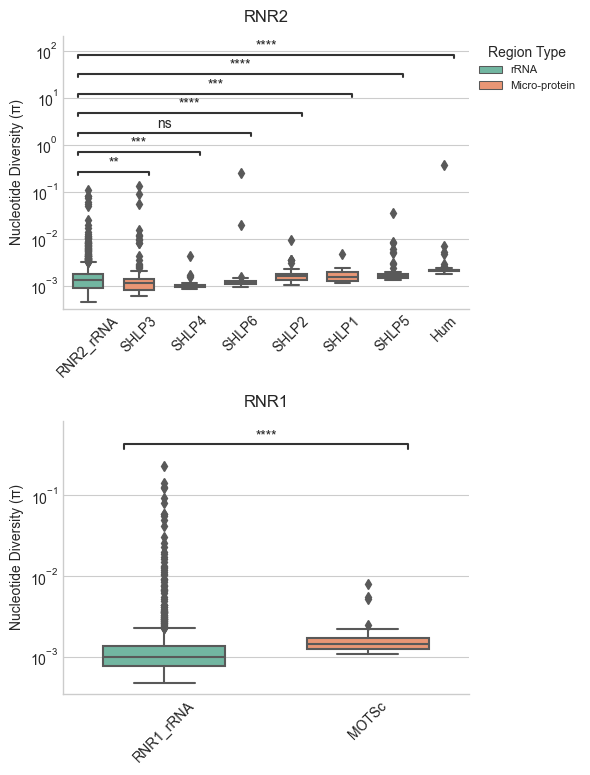

In [49]:
reload(mosa)
mosa.plot_nucleotide_diversity_comparison({'RNR2' : results_rnr2, 'RNR1' : results_rnr1}, figsize = (6,8), rotate_labels = True, log_scale = True, legend_inside = False, plot_title = '', output_file = os.path.join(PATH, 'figures', 'RNR1_RNR2_diversity_comparison.png'))

2025-05-25 14:16:25,060 - INFO - Starting analysis for ATP8_ATP6 with 1 micro-proteins
2025-05-25 14:16:25,061 - INFO - Using start position 8360 for coordinate conversion
2025-05-25 14:16:25,062 - INFO - Using polymorphism threshold of 1.00%
2025-05-25 14:16:25,063 - INFO - Using sequence column: atp8_atp6_seq
2025-05-25 14:16:25,064 - INFO - Gene length: 886 nucleotides
2025-05-25 14:16:25,066 - INFO - Identified 46 positions in micro-proteins and 840 positions in non-coding rRNA regions
2025-05-25 14:16:25,066 - INFO - Generating consensus sequence as reference
2025-05-25 14:16:36,129 - INFO - Generated consensus sequence of length 886
2025-05-25 14:16:36,130 - INFO - Calculating nucleotide diversity and polymorphism metrics
2025-05-25 14:16:46,074 - INFO - Calculating metrics using sliding window of size 10
2025-05-25 14:16:46,079 - INFO -   Mean minor allele frequency: 0.0014
2025-05-25 14:16:46,081 - INFO -   Flanking rRNA mean minor allele frequency: 0.0026
2025-05-25 14:16:46,0

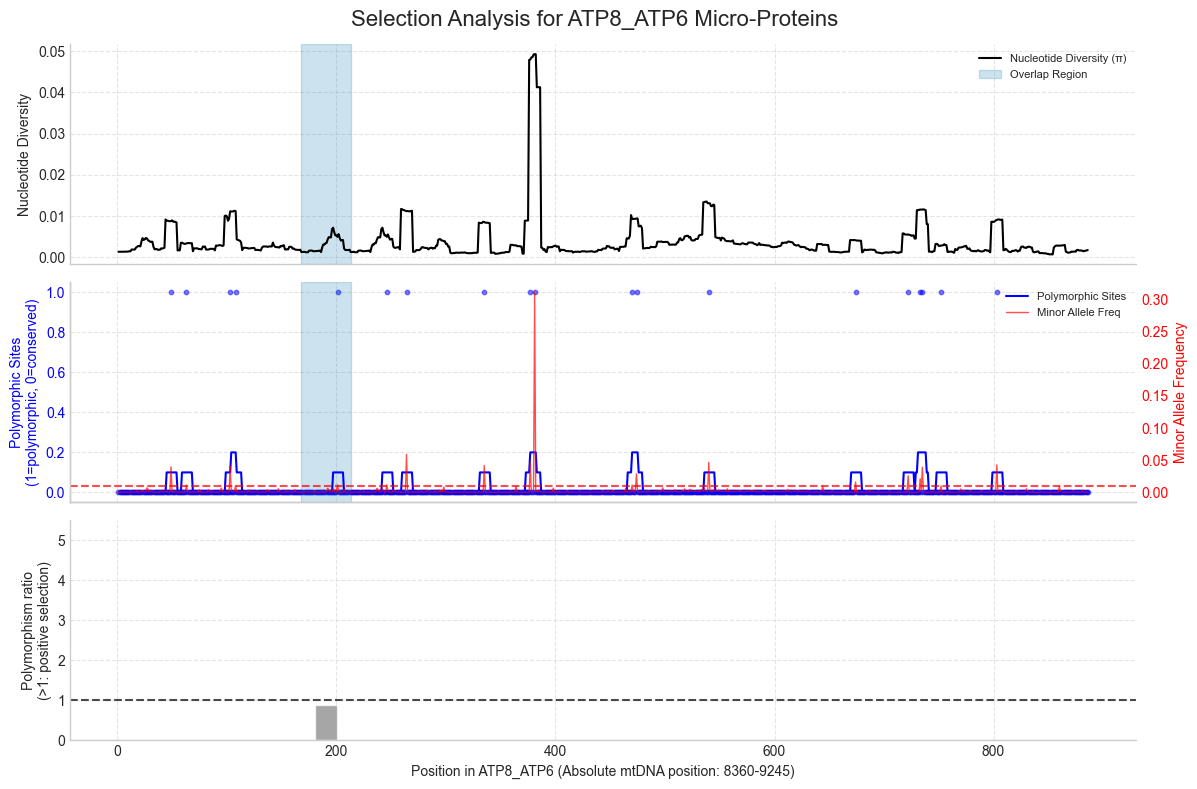

In [50]:
reload(mosa)
# Load your sequence data into a DataFrame
col = 'atp8_atp6_seq'
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1'][col].iloc[0]
# Run analysis
results = mosa.calculate_mk_metrics(
    df=hs_pop_df,
    gene_name='ATP8_ATP6',
    sequence_col = col,
    micro_protein_coords=atp8_overlaps,
    window_size=10,
    flank_size=200,
    plot=True,
    output_file=os.path.join(PATH, 'figures', 'ATP8_ATP6_selection_analysis.png'),
    start_pos=gene_dict['atp8'][0],
    polymorphism_threshold = 0.01,
    figsize = (12, 8),
    legend_inside = True
)

# Access results
position_data_rnr2 = results['position_metrics']
micro_protein_stats_rnr2 = results['micro_protein_metrics']

2025-05-25 14:16:46,864 - INFO - Starting analysis for ND4L_ND4 with 1 micro-proteins
2025-05-25 14:16:46,865 - INFO - Using start position 10464 for coordinate conversion
2025-05-25 14:16:46,865 - INFO - Using polymorphism threshold of 1.00%
2025-05-25 14:16:46,866 - INFO - Using sequence column: nad4L_nad4_seq
2025-05-25 14:16:46,866 - INFO - Gene length: 1673 nucleotides
2025-05-25 14:16:46,866 - INFO - Identified 7 positions in micro-proteins and 1666 positions in non-coding rRNA regions
2025-05-25 14:16:46,867 - INFO - Generating consensus sequence as reference
2025-05-25 14:16:59,102 - INFO - Generated consensus sequence of length 1673
2025-05-25 14:16:59,103 - INFO - Calculating nucleotide diversity and polymorphism metrics
2025-05-25 14:17:11,349 - INFO - Calculating metrics using sliding window of size 10
2025-05-25 14:17:11,356 - INFO -   Mean minor allele frequency: 0.0004
2025-05-25 14:17:11,358 - INFO -   Flanking rRNA mean minor allele frequency: 0.0021
2025-05-25 14:17:1

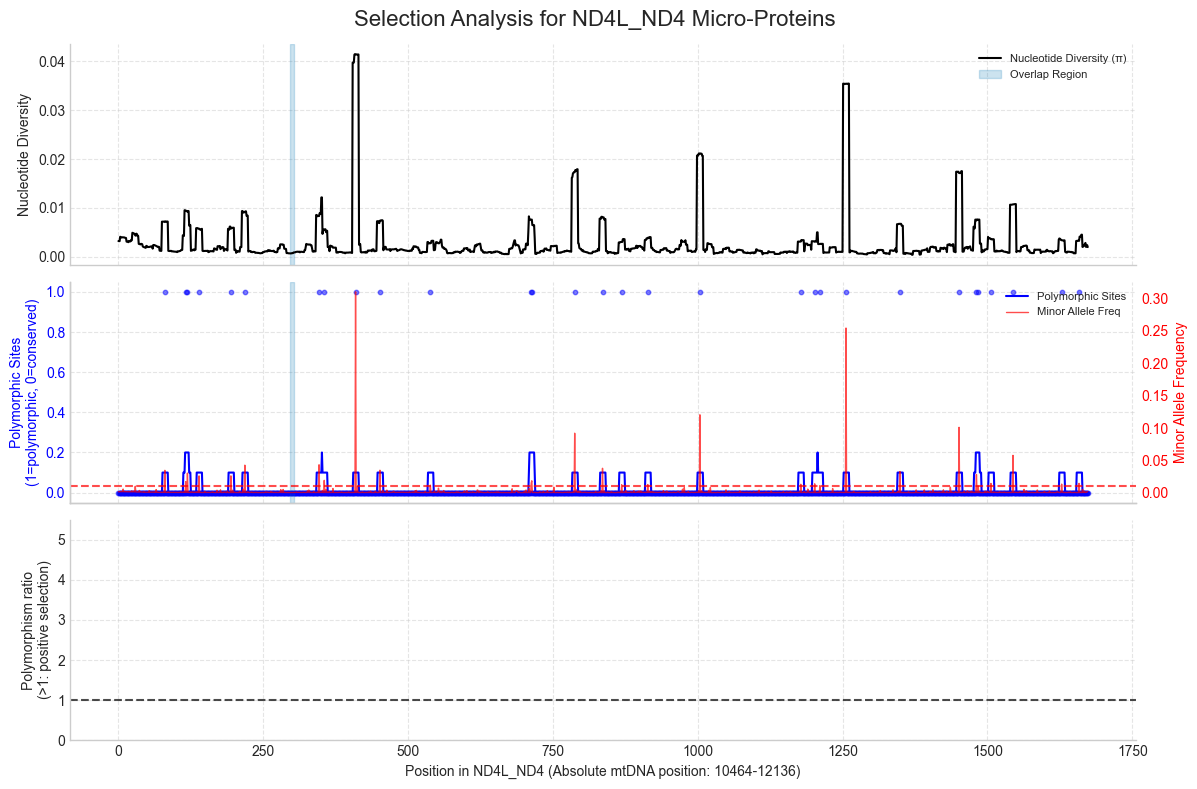

In [51]:
reload(mosa)
# Load your sequence data into a DataFrame
col = 'nad4L_nad4_seq'
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1'][col].iloc[0]
# Run analysis
results = mosa.calculate_mk_metrics(
    df=hs_pop_df,
    gene_name='ND4L_ND4',
    sequence_col = col,
    micro_protein_coords=nad4L_overlaps,
    window_size=10,
    flank_size=200,
    plot=True,
    output_file=os.path.join(PATH, 'figures', 'ND4L_ND4_selection_analysis.png'),
    start_pos=gene_dict['nad4L'][0],
    polymorphism_threshold = 0.01,
    figsize = (12, 8),
    legend_inside = True
)

# Access results
position_data_rnr2 = results['position_metrics']
micro_protein_stats_rnr2 = results['micro_protein_metrics']

In [52]:
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1']['RNR2_seq'].iloc[0]


2025-05-25 14:17:12,198 - mtdna_analysis - INFO - Starting analysis of RNR2 with 7 microprotein regions
2025-05-25 14:17:12,198 - INFO - Starting analysis of RNR2 with 7 microprotein regions
2025-05-25 14:17:12,200 - mtdna_analysis - INFO - Identifying mutations from 66328 sequences
2025-05-25 14:17:12,200 - INFO - Identifying mutations from 66328 sequences
2025-05-25 14:17:12,201 - mtdna_analysis - INFO - No reference sequence provided, using most common sequence as reference
2025-05-25 14:17:12,201 - INFO - No reference sequence provided, using most common sequence as reference
2025-05-25 14:17:16,109 - mtdna_analysis - INFO - Identified 142301 mutations across 47566 sequences
2025-05-25 14:17:16,109 - INFO - Identified 142301 mutations across 47566 sequences
2025-05-25 14:17:16,113 - mtdna_analysis - INFO - Classifying mutations with prevalence threshold 0.01
2025-05-25 14:17:16,113 - INFO - Classifying mutations with prevalence threshold 0.01
2025-05-25 14:17:17,471 - mtdna_analysi

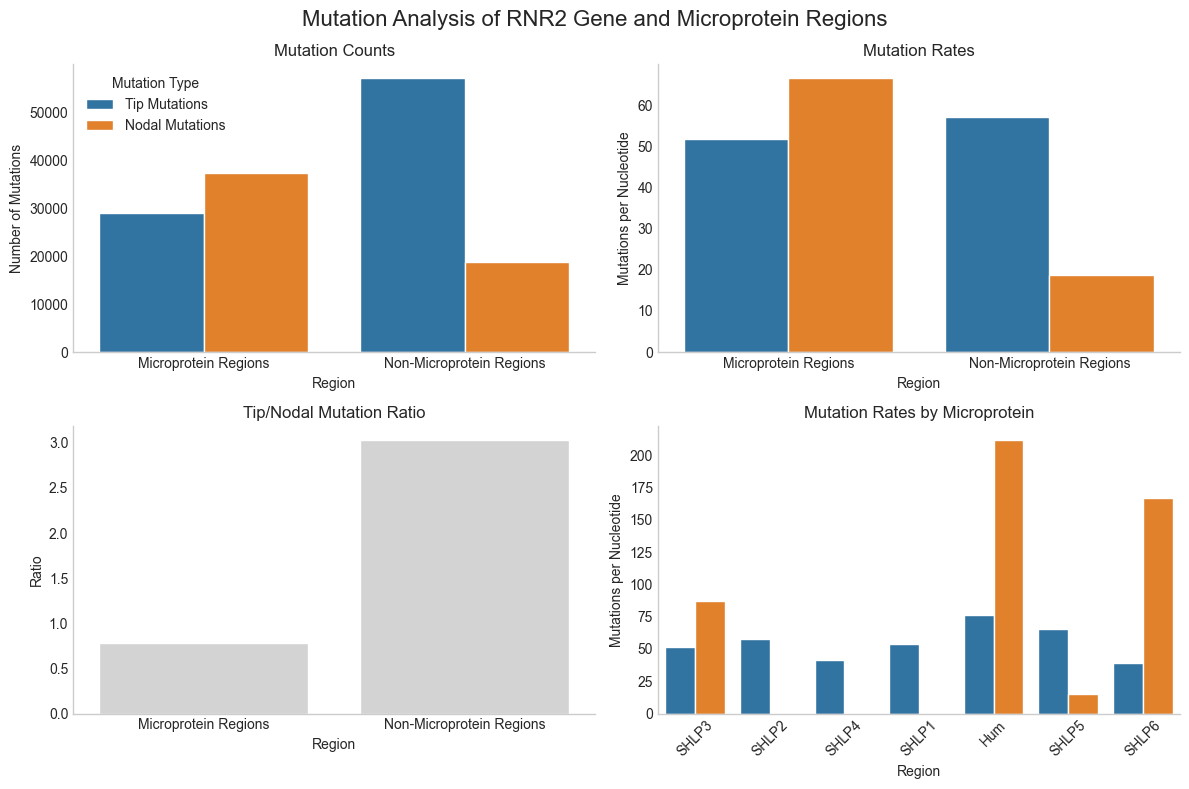

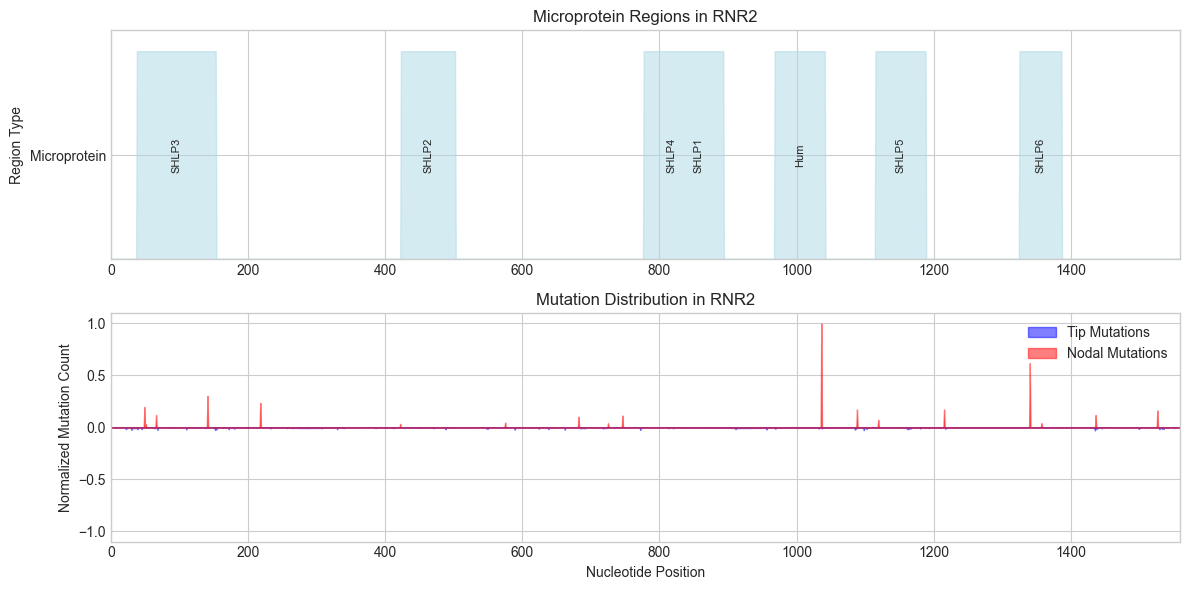

In [53]:
# Load your data (example format)
reload(mmca)
# Run the analysis
tip_nodal_rnr2 = mmca.analyze_microprotein_conservation(
    sequences_df=hs_pop_df[['RNR2_seq']],
    microprotein_regions=rnr2_overlaps,
    gene_name='RNR2',
    prevalence_threshold=0.01,  # Define threshold for tip vs nodal classification
    plot_results = True,
    export_results = True,
    visualize_positions = True,
    start_pos = gene_dict['RNR2'][0],
    plot_style = 'whitegrid',
    plot_filename = os.path.join(PATH, 'figures', 'RNR2_microprotein_conservation.png'),
    plot_figsize = (12, 8),

)

tip_nodal_metrics_rnr2 = mmca.calculate_conservation_metrics(results)

2025-05-25 14:17:23,228 - mtdna_analysis - INFO - Starting analysis of RNR1 with 1 microprotein regions
2025-05-25 14:17:23,228 - INFO - Starting analysis of RNR1 with 1 microprotein regions
2025-05-25 14:17:23,229 - mtdna_analysis - INFO - Identifying mutations from 66328 sequences
2025-05-25 14:17:23,229 - INFO - Identifying mutations from 66328 sequences
2025-05-25 14:17:23,231 - mtdna_analysis - INFO - No reference sequence provided, using most common sequence as reference
2025-05-25 14:17:23,231 - INFO - No reference sequence provided, using most common sequence as reference
2025-05-25 14:17:24,832 - mtdna_analysis - INFO - Identified 85517 mutations across 30818 sequences
2025-05-25 14:17:24,832 - INFO - Identified 85517 mutations across 30818 sequences
2025-05-25 14:17:24,835 - mtdna_analysis - INFO - Classifying mutations with prevalence threshold 0.01
2025-05-25 14:17:24,835 - INFO - Classifying mutations with prevalence threshold 0.01
2025-05-25 14:17:25,771 - mtdna_analysis 

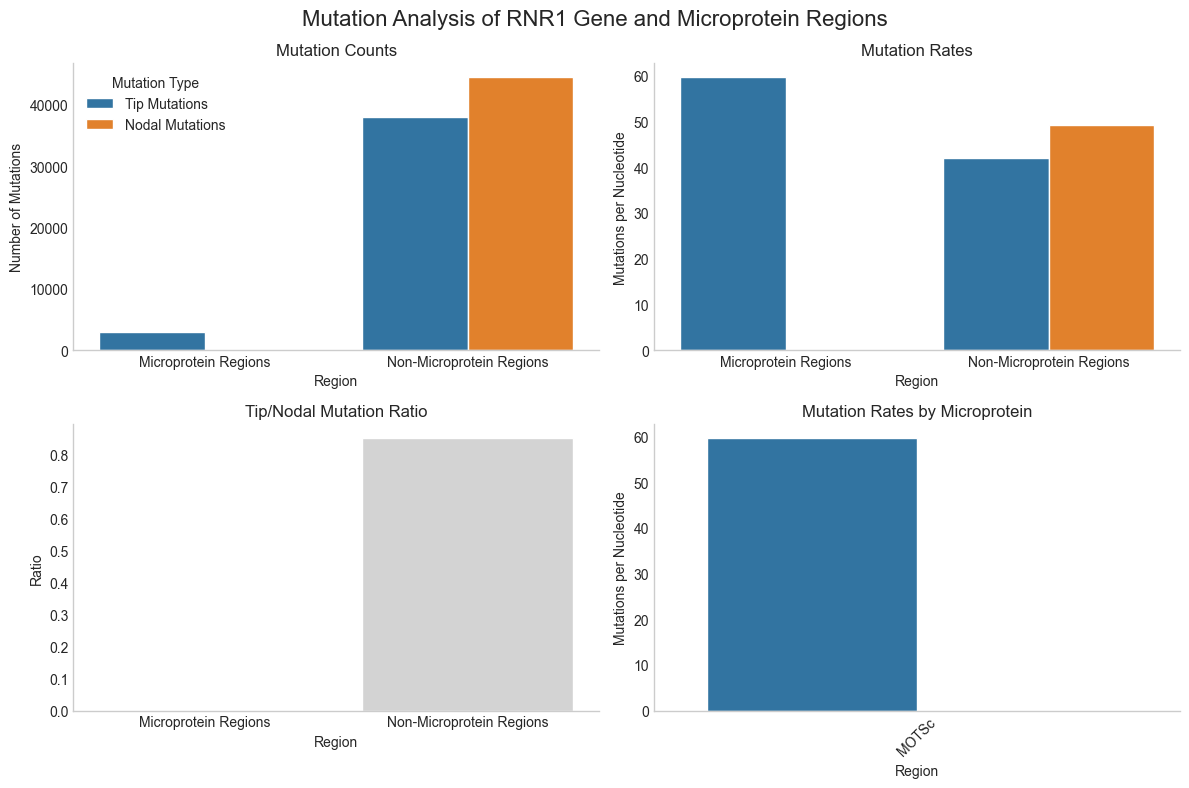

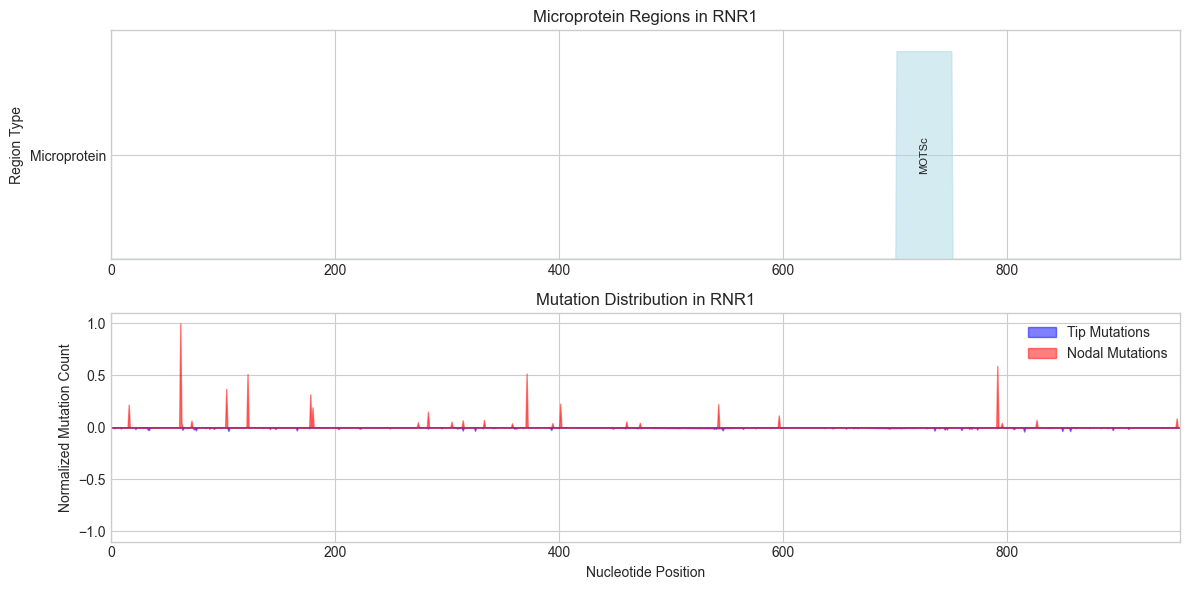

In [54]:
# Load your data (example format)
reload(mmca)
# Run the analysis
tip_nodal_rnr1 = mmca.analyze_microprotein_conservation(
    sequences_df=hs_pop_df[['RNR1_seq']],
    microprotein_regions=rnr1_overlaps,
    gene_name='RNR1',
    prevalence_threshold=0.01,  # Define threshold for tip vs nodal classification
    plot_results = True,
    export_results = True,
    visualize_positions = True,
    start_pos = gene_dict['RNR1'][0],
    plot_style = 'whitegrid',
    plot_filename = os.path.join(PATH, 'figures', 'RNR1_microprotein_conservation.png'),
    plot_figsize = (12, 8),

)

tip_nodal_metrics_rnr1= mmca.calculate_conservation_metrics(results)

In [55]:
# Load the phylogenetic tree of all mtDNA sequences as string
tree_path = os.path.join(PATH, 'data', 'hs_pop_seq', 'all_hs_mtdna.trimmed.msa.tree')
with open(tree_path, 'r') as f:
    tree = f.read()

2025-05-25 14:17:29,828 - INFO - Starting complete analysis for RNR2 with 7 micro-proteins
2025-05-25 14:17:29,829 - INFO - Gene starts at mtDNA position 1665
2025-05-25 14:17:29,829 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85


2025-05-25 14:17:29,831 - INFO - Running mutation analysis...
2025-05-25 14:17:29,832 - INFO - Starting analysis for RNR2 with 7 micro-proteins
2025-05-25 14:17:29,833 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85, nodes_threshold=inf
2025-05-25 14:17:29,833 - INFO - Parsing newick tree
2025-05-25 14:17:31,729 - INFO - Successfully parsed tree with 66328 terminal nodes
2025-05-25 14:17:31,730 - INFO - Identifying mutations in 66328 sequences
2025-05-25 14:17:31,731 - INFO - Generating consensus sequence as reference
2025-05-25 14:17:53,223 - INFO - Generated consensus sequence of length 1559
2025-05-25 14:18:00,340 - INFO - Classifying mutations using phylogenetic tree with criteria: min_sequences=35, node_prevalence_threshold=0.85, nodes_threshold=inf
2025-05-25 14:18:34,420 - INFO - Processing mutations: 0/4677 (0.0%)
2025-05-25 14:19:04,609 - INFO - Processing mutations: 467/4677 (10.0%)
2025-05-25 14:19:44,749 - INFO - Processing mutations: 934/4677 (20.

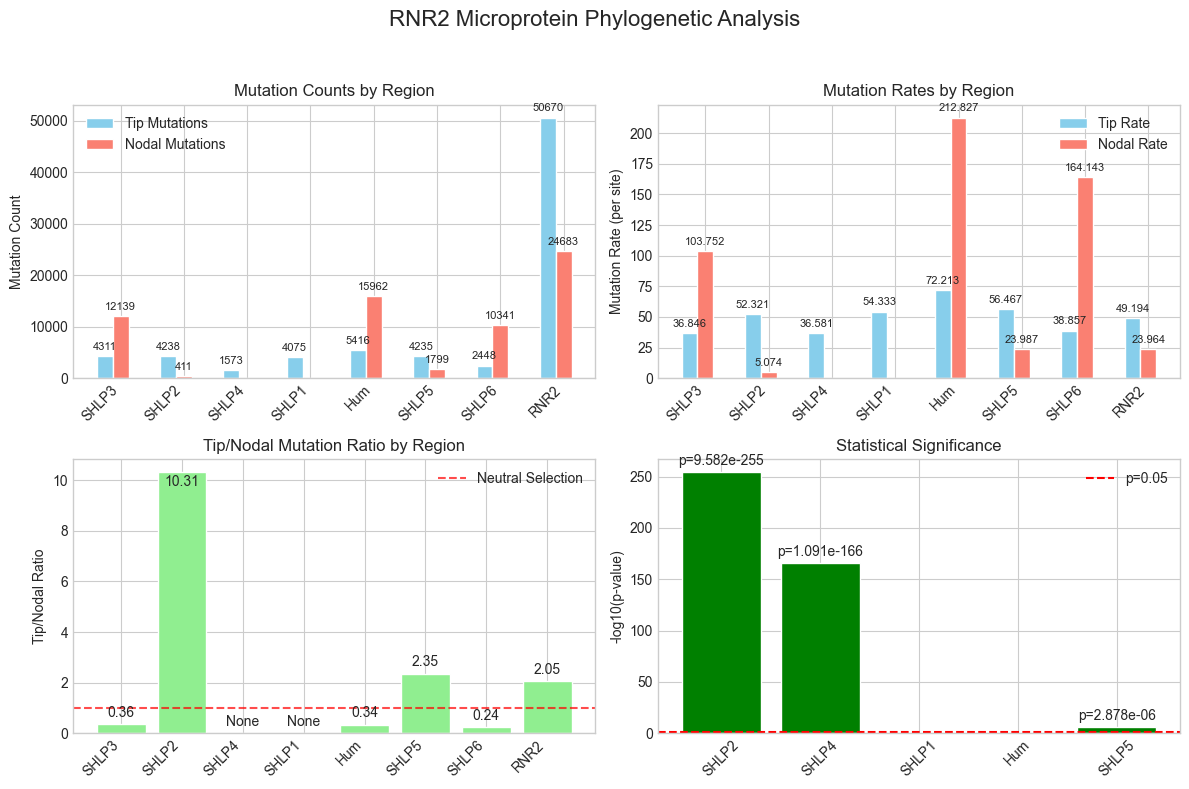

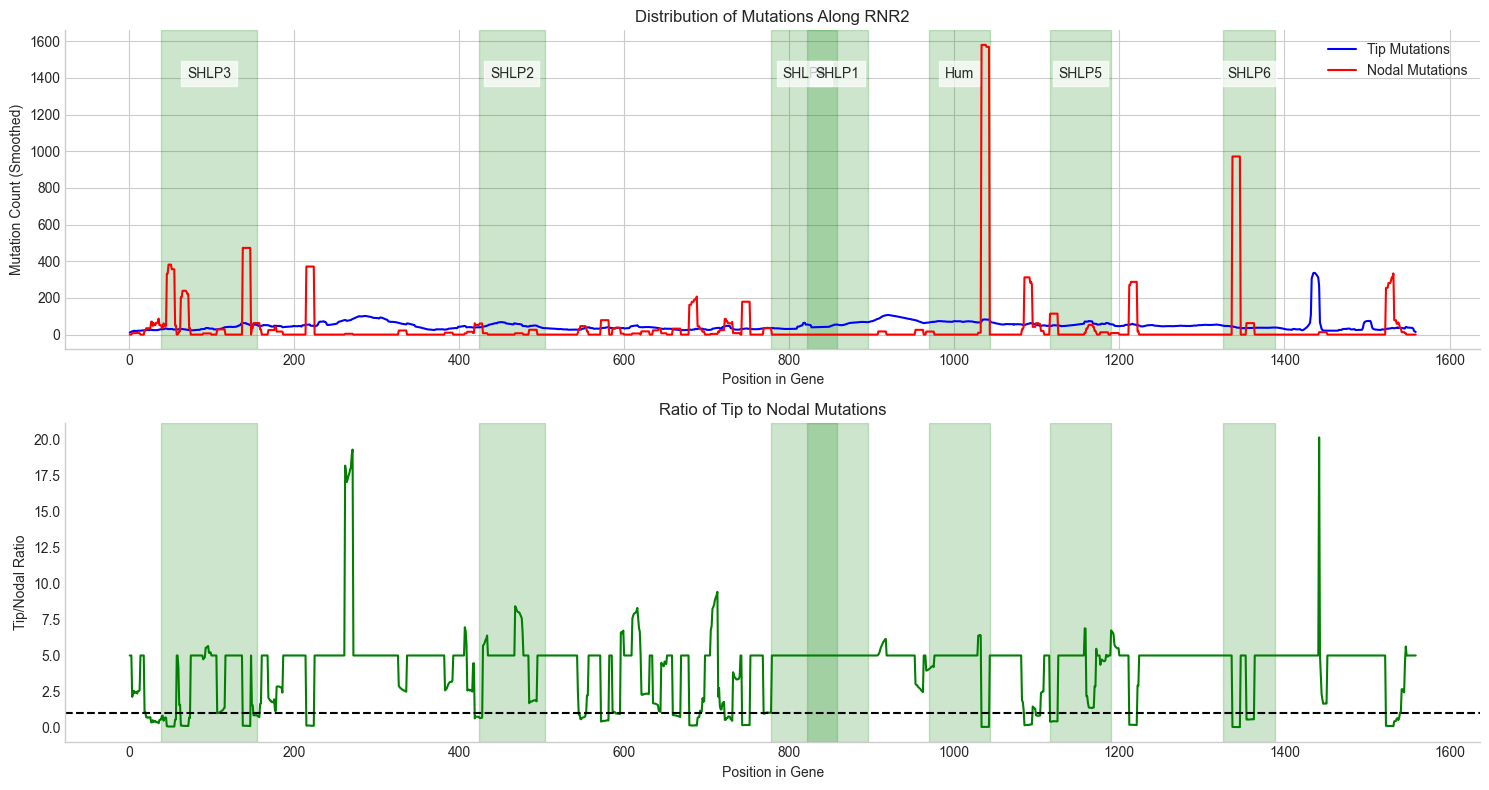

In [56]:
# Run the phylogenetic micro-protein nodal\tip mutation analysis
reload(mmpa)
# Define microprotein regions in RNR1 (as mentioned in your question)
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1']['RNR2_seq'].iloc[0]

# Run the analysis
results_rnr2_phylo = mmpa.analyze_mtdna_microproteins(
    sequences_df=hs_pop_df[['ID', 'RNR2_seq']],
    micro_protein_coords=rnr2_overlaps,
    newick_tree = tree,
    gene_name='RNR2',
    start_pos = gene_dict['RNR2'][0],
    id_column = 'ID',
    sequence_column = 'RNR2_seq',
    output_dir = os.path.join(PATH, 'figures', 'RNR2_phylogenetic_analysis'),
    plot_title = 'RNR2 Microprotein Phylogenetic Analysis',
    figsize = (12,8),
    min_sequences = 35,
    node_prevalence_threshold = 0.85,
    nodes_threshold = np.inf, # Set to inf to remove recurring nodal mutations
)


2025-05-25 14:22:44,359 - INFO - Starting complete analysis for ND4L_ND4 with 1 micro-proteins
2025-05-25 14:22:44,360 - INFO - Gene starts at mtDNA position 10464
2025-05-25 14:22:44,360 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85
2025-05-25 14:22:44,362 - INFO - Running mutation analysis...
2025-05-25 14:22:44,362 - INFO - Starting analysis for ND4L_ND4 with 1 micro-proteins
2025-05-25 14:22:44,363 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85, nodes_threshold=inf
2025-05-25 14:22:44,363 - INFO - Parsing newick tree
2025-05-25 14:22:45,485 - INFO - Successfully parsed tree with 66328 terminal nodes
2025-05-25 14:22:45,485 - INFO - Identifying mutations in 66328 sequences
2025-05-25 14:22:45,486 - INFO - Generating consensus sequence as reference
2025-05-25 14:22:57,172 - INFO - Generated consensus sequence of length 1673
2025-05-25 14:23:02,228 - INFO - Classifying mutations using phylogenetic tree with criteria: min_sequences

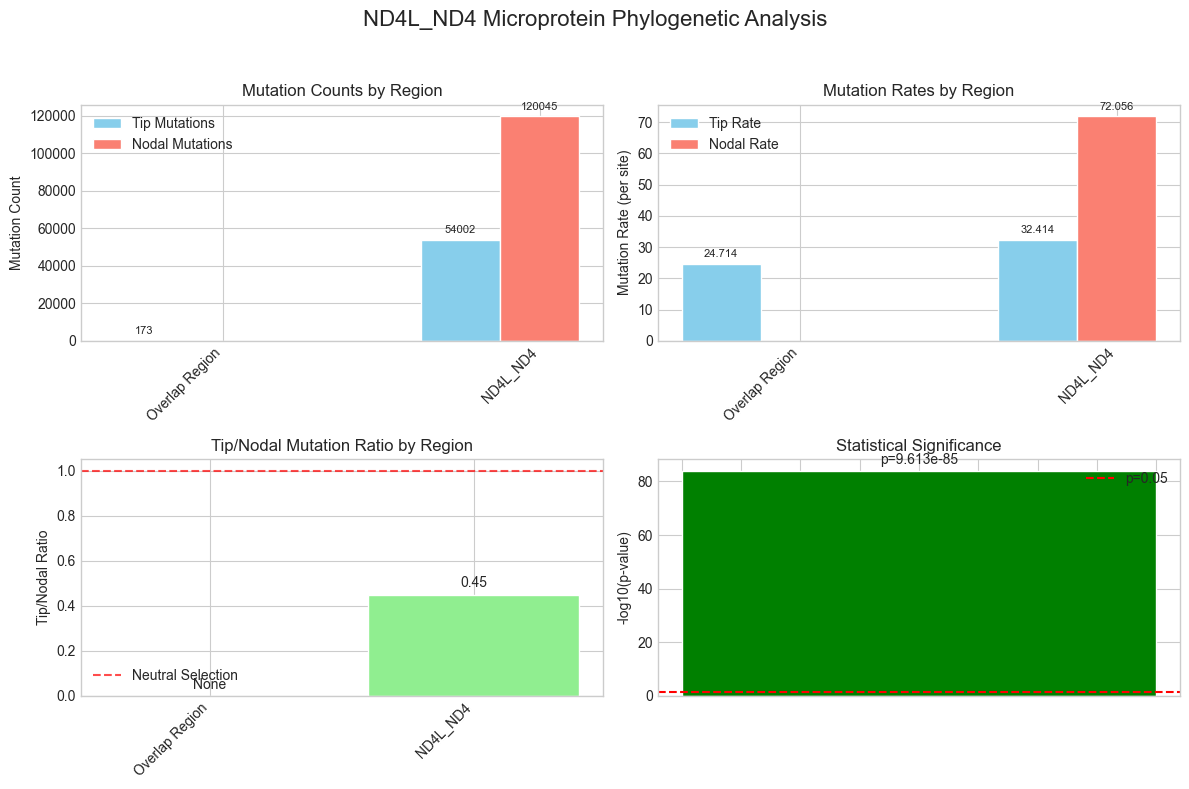

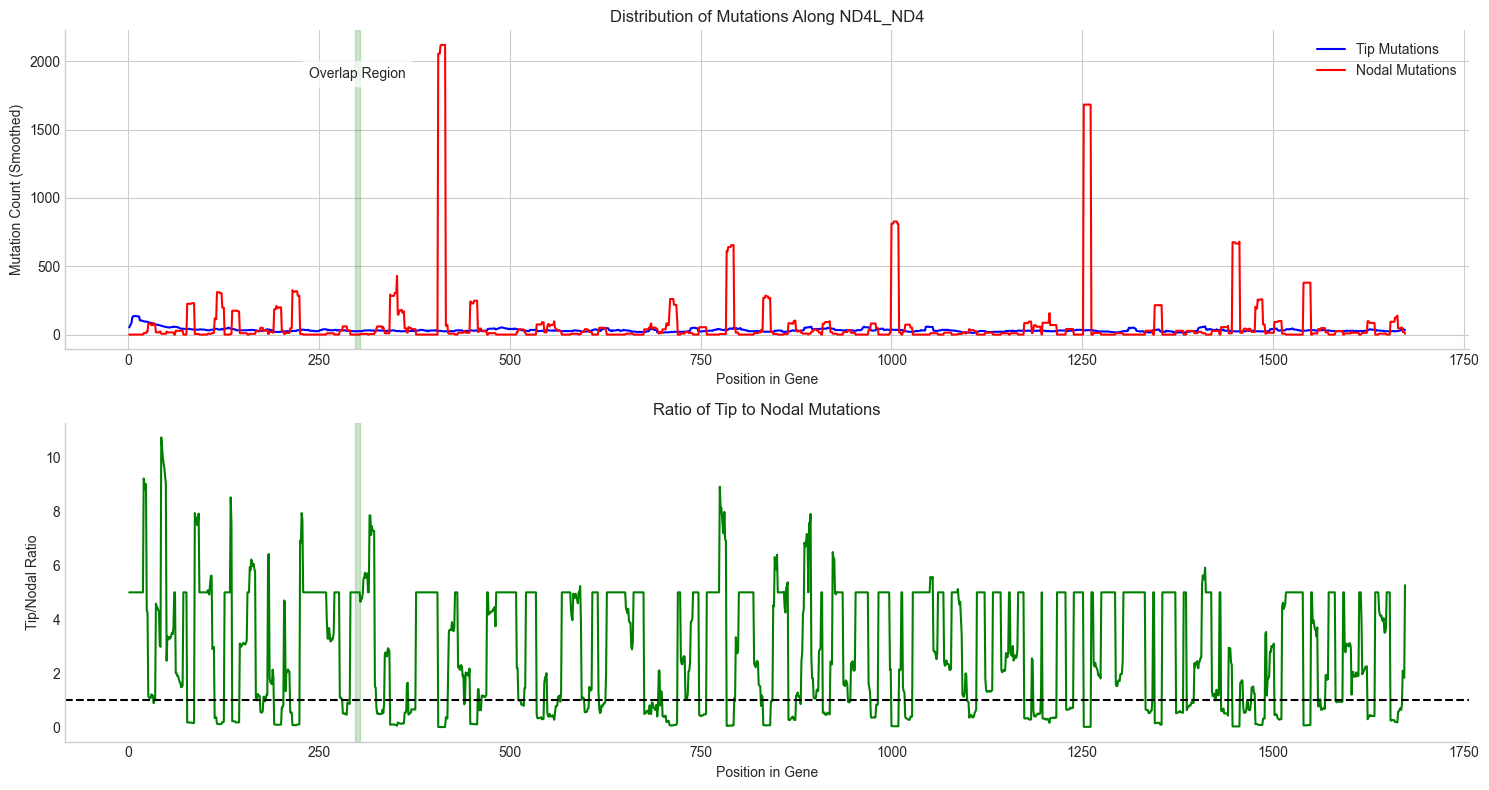

In [57]:
# Run the phylogenetic micro-protein nodal\tip mutation analysis
reload(mmpa)
# Define microprotein regions in RNR1 (as mentioned in your question)
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1']['nad4L_nad4_seq'].iloc[0]

# Run the analysis
results_nd4L_nd4_phylo = mmpa.analyze_mtdna_microproteins(
    sequences_df=hs_pop_df[['ID', 'nad4L_nad4_seq']],
    micro_protein_coords=nad4L_overlaps,
    newick_tree = tree,
    start_pos = gene_dict['nad4L'][0],
    id_column = 'ID',
    sequence_column = 'nad4L_nad4_seq',
    output_dir = 'figures',
    gene_name = 'ND4L_ND4',
    plot_title = 'ND4L_ND4 Microprotein Phylogenetic Analysis',
    figsize = (12,8),
    min_sequences = 35,
    node_prevalence_threshold = 0.85,
    nodes_threshold = np.inf # Set to inf to include all nodes

)


2025-05-25 14:27:57,867 - INFO - Starting complete analysis for ATP8_ATP6 with 1 micro-proteins
2025-05-25 14:27:57,868 - INFO - Gene starts at mtDNA position 8360
2025-05-25 14:27:57,869 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85
2025-05-25 14:27:57,871 - INFO - Running mutation analysis...
2025-05-25 14:27:57,872 - INFO - Starting analysis for ATP8_ATP6 with 1 micro-proteins
2025-05-25 14:27:57,873 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85, nodes_threshold=inf
2025-05-25 14:27:57,873 - INFO - Parsing newick tree
2025-05-25 14:27:59,811 - INFO - Successfully parsed tree with 66328 terminal nodes
2025-05-25 14:27:59,812 - INFO - Identifying mutations in 66328 sequences
2025-05-25 14:27:59,812 - INFO - Generating consensus sequence as reference
2025-05-25 14:28:10,897 - INFO - Generated consensus sequence of length 886
2025-05-25 14:28:16,046 - INFO - Classifying mutations using phylogenetic tree with criteria: min_sequences

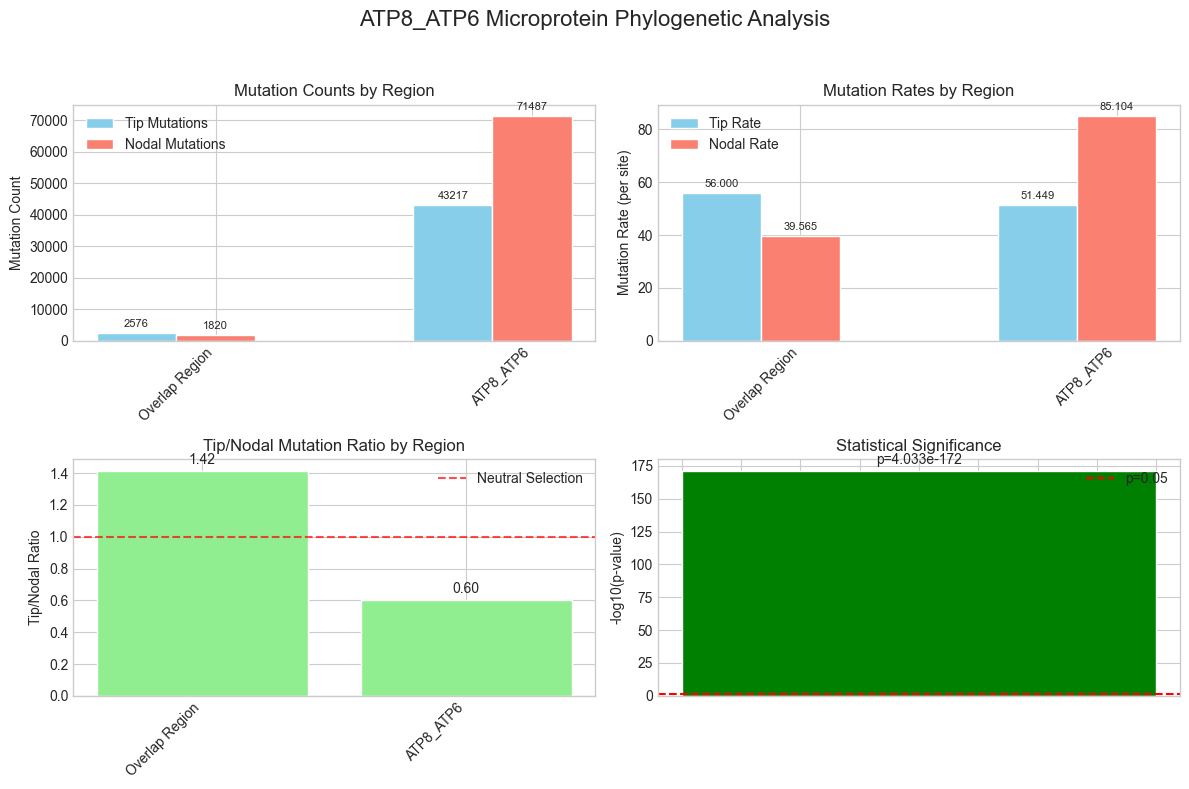

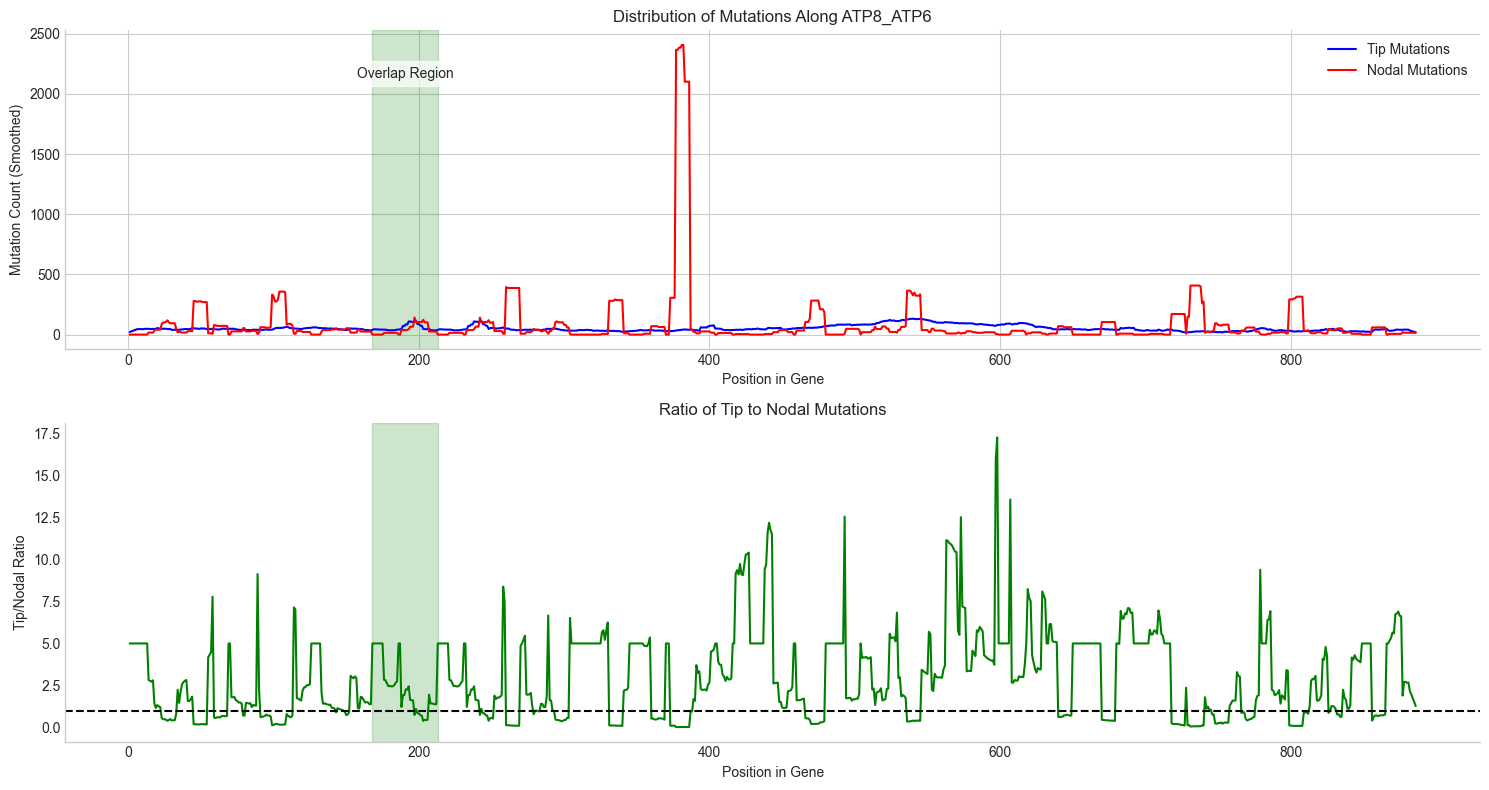

In [58]:
# Run the phylogenetic micro-protein nodal\tip mutation analysis
reload(mmpa)
# Define microprotein regions in RNR1 (as mentioned in your question)
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1']['atp8_atp6_seq'].iloc[0]

# Run the analysis
results_atp8_phylo = mmpa.analyze_mtdna_microproteins(
    sequences_df=hs_pop_df[['ID', 'atp8_atp6_seq']],
    micro_protein_coords=atp8_overlaps,
    newick_tree = tree,
    start_pos = gene_dict['atp8'][0],
    id_column = 'ID',
    gene_name = 'ATP8_ATP6',
    sequence_column = 'atp8_atp6_seq',
    output_dir = 'figures',
    plot_title = 'ATP8_ATP6 Microprotein Phylogenetic Analysis',
    figsize = (12,8),
    min_sequences = 35,
    node_prevalence_threshold = 0.85,
    nodes_threshold = np.inf # Set to inf to include all nodes

)


2025-05-25 14:32:03,844 - INFO - Starting complete analysis for RNR1 with 1 micro-proteins
2025-05-25 14:32:03,845 - INFO - Gene starts at mtDNA position 642
2025-05-25 14:32:03,845 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85
2025-05-25 14:32:03,846 - INFO - Running mutation analysis...
2025-05-25 14:32:03,847 - INFO - Starting analysis for RNR1 with 1 micro-proteins
2025-05-25 14:32:03,848 - INFO - Using criteria: min_sequences=35, node_prevalence_threshold=0.85, nodes_threshold=inf
2025-05-25 14:32:03,848 - INFO - Parsing newick tree
2025-05-25 14:32:06,094 - INFO - Successfully parsed tree with 66328 terminal nodes
2025-05-25 14:32:06,096 - INFO - Identifying mutations in 66328 sequences
2025-05-25 14:32:06,096 - INFO - Generating consensus sequence as reference
2025-05-25 14:32:17,895 - INFO - Generated consensus sequence of length 954
2025-05-25 14:32:23,215 - INFO - Classifying mutations using phylogenetic tree with criteria: min_sequences=35, node_p

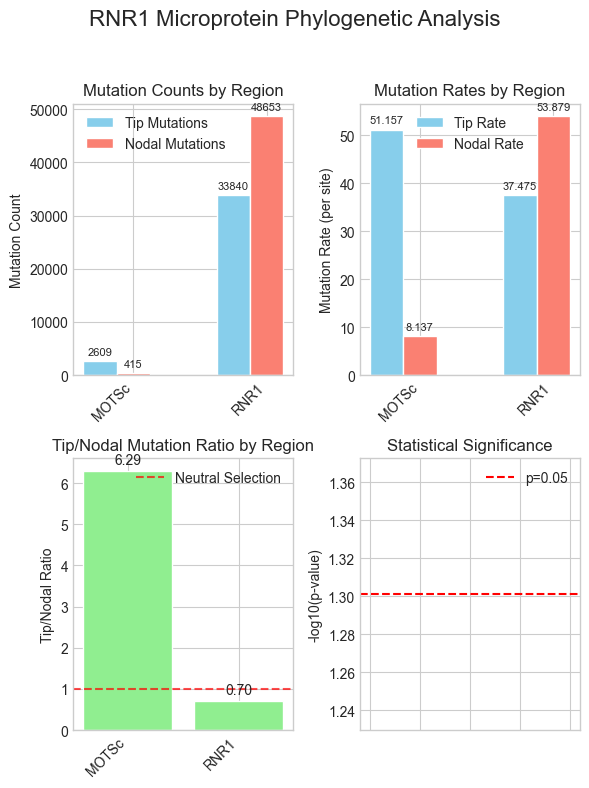

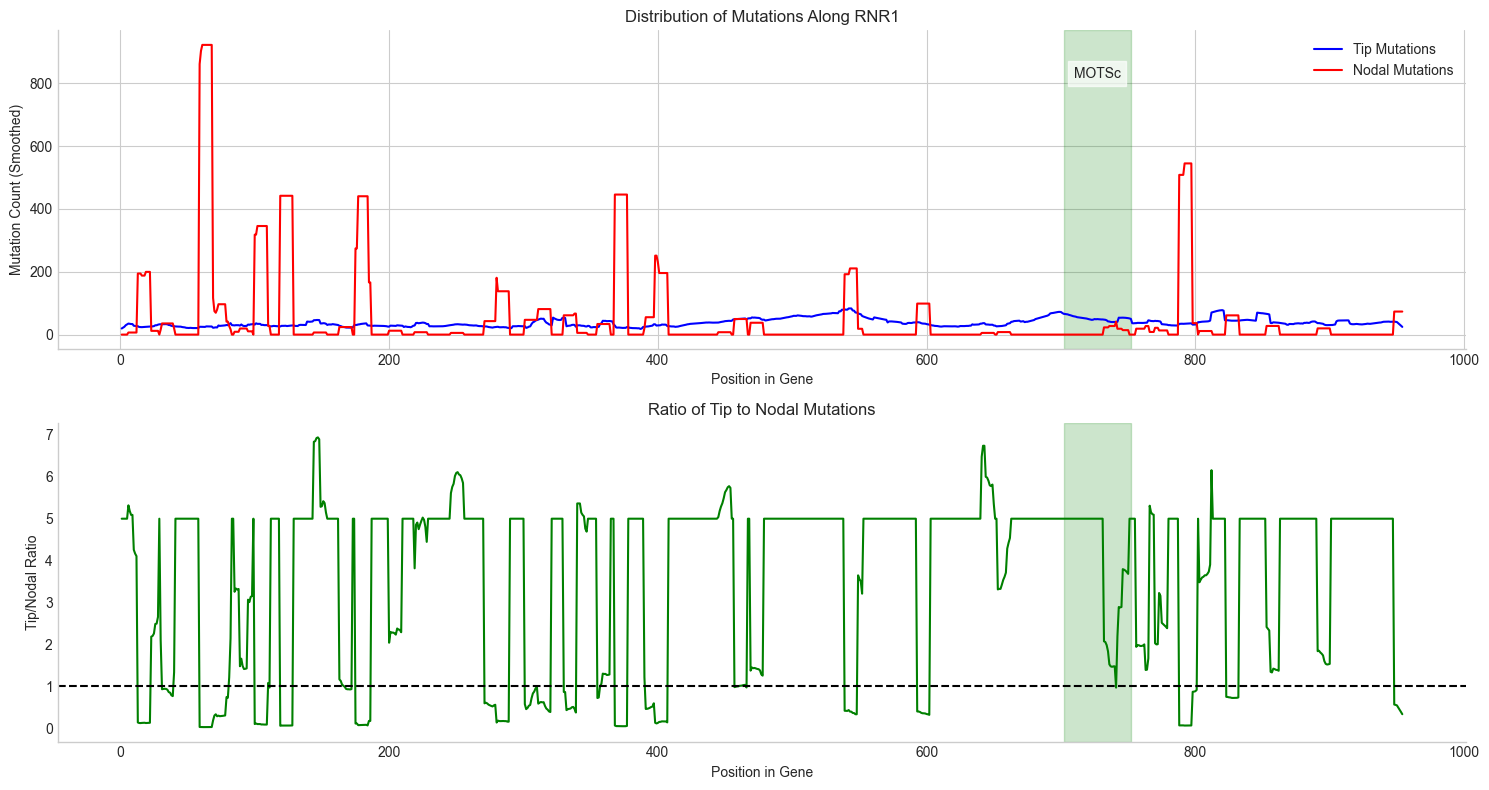

In [59]:
# Run the phylogenetic micro-protein nodal\tip mutation analysis
reload(mmpa)
# Define microprotein regions in RNR1 (as mentioned in your question)
ref_seq = hs_pop_df[hs_pop_df['ID'] == 'NC_012920.1']['RNR1_seq'].iloc[0]

# Run the analysis
results_rnr1_phylo = mmpa.analyze_mtdna_microproteins(
    sequences_df=hs_pop_df[['ID', 'RNR1_seq']],
    micro_protein_coords=rnr1_overlaps,
    newick_tree = tree,
    gene_name='RNR1',
    start_pos = gene_dict['RNR1'][0],
    id_column = 'ID',
    sequence_column = 'RNR1_seq',
    output_dir = 'figures',
    plot_title = 'RNR1 Microprotein Phylogenetic Analysis',
    figsize = (6,8),
    min_sequences = 35,
    node_prevalence_threshold = 0.85,
    nodes_threshold = np.inf # Set to inf to include all nodes
)


In [ ]:
contingency

array([[ 2748,   415],
       [33701, 48653]], dtype=int64)

In [ ]:
from scipy.stats import chi2_contingency
oddsratio, p_value, _ ,_ = chi2_contingency(contingency)

In [ ]:
results_rnr2['mutations']

,id,all_mutations,tip_mutations,nodal_mutations,rnm_mutations,tip_positions,nodal_positions,rnm_positions,n_all_mutations,n_tip_mutations,n_nodal_mutations,n_rnm_mutations
0,PP134863.1,[c1437n],[c1437n],[],[],[1437],[],[],1,1,0,0
1,PV067394.1,[c1437-],[c1437-],[],[],[1437],[],[],1,1,0,0
2,PV067393.1,[],[],[],[],[],[],[],0,0,0,0
3,PV067392.1,[],[],[],[],[],[],[],0,0,0,0
4,PV067391.1,"[a94g, t411c]",[],"[a94g, t411c]",[],[],"[94, 411]",[],2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66323,AP008252.1,"[c1097t, g1341a]",[],"[c1097t, g1341a]",[],[],"[1097, 1341]",[],2,0,2,0
66324,AP008251.1,"[c1097t, g1341a]",[],"[c1097t, g1341a]",[],[],"[1097, 1341]",[],2,0,2,0
66325,AP008250.1,[],[],[],[],[],[],[],0,0,0,0
66326,AP008249.1,"[t957c, c1103t]",[],"[t957c, c1103t]",[],[],"[957, 1103]",[],2,0,2,0


In [ ]:
# Save results_rnr2, results_rnr1, results_nd4L_nd4, results_atp8 statistics csv files
results_rnr2_phylo['statistics'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR2_phylogenetic_analysis.csv'))
results_rnr1_phylo['statistics'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR1_phylogenetic_analysis.csv'))
results_nd4L_nd4_phylo['statistics'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ND4L_ND4_phylogenetic_analysis.csv'))
results_atp8_phylo['statistics'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ATP8_ATP6_phylogenetic_analysis.csv'))
# Save results_rnr2, results_rnr1, results_nd4L_nd4, results_atp8 summary csv files
results_rnr2_phylo['summary'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR2_phylogenetic_analysis_summary.csv'))
results_rnr1_phylo['summary'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR1_phylogenetic_analysis_summary.csv'))
results_nd4L_nd4_phylo['summary'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ND4L_ND4_phylogenetic_analysis_summary.csv'))
results_atp8_phylo['summary'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ATP8_ATP6_phylogenetic_analysis_summary.csv'))
# Save results_rnr2, results_rnr1, results_nd4L_nd4, results_atp8 mutations csv files
results_rnr2_phylo['mutations'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR2_phylogenetic_analysis_mutations.csv'))
results_rnr1_phylo['mutations'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR1_phylogenetic_analysis_mutations.csv'))
results_nd4L_nd4_phylo['mutations'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ND4L_ND4_phylogenetic_analysis_mutations.csv'))
results_atp8_phylo['mutations'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ATP8_ATP6_phylogenetic_analysis_mutations.csv'))
# Save results_rnr2, results_rnr1, results_nd4L_nd4, results_atp8 positions csv files
results_rnr2_phylo['positions'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR2_phylogenetic_analysis_positions.csv'))
results_rnr1_phylo['positions'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'RNR1_phylogenetic_analysis_positions.csv'))
results_nd4L_nd4_phylo['positions'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ND4L_ND4_phylogenetic_analysis_positions.csv'))
results_atp8_phylo['positions'].to_csv(os.path.join(PATH, 'data', 'mtdna_overlap_phylogenetic_analysis', 'ATP8_ATP6_phylogenetic_analysis_positions.csv'))


NameError: name 'results_rnr2_phylo' is not defined

In [ ]:
results_rnr2['summary']


,Region,Length,TipMutations,NodalMutations,TotalMutations,TipRate,NodalRate,RNMRate,TotalRate,TipNodalRatio
0,SHLP3,117,4156,11797,15953,35.521368,100.829060,0.0,136.350427,0.352293
1,SHLP2,81,4254,939,5193,52.518519,11.592593,0.0,64.111111,4.530351
2,SHLP4,43,1537,350,1887,35.744186,8.139535,0.0,43.883721,4.391429
3,SHLP1,75,3970,0,3970,52.933333,0.000000,0.0,52.933333,inf
4,Hum,75,5383,15962,21345,71.773333,212.826667,0.0,284.600000,0.337238
5,SHLP5,75,4157,1799,5956,55.426667,23.986667,0.0,79.413333,2.310728
6,SHLP6,63,2499,10341,12840,39.666667,164.142857,0.0,203.809524,0.241659
7,RNR2,1030,51010,24147,75157,49.524272,23.443689,0.0,72.967961,2.112478


2025-05-22 16:52:01,113 - INFO - Generating combined visualization from multiple analysis results
2025-05-22 16:52:04,121 - INFO - Combined plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\combined_microprotein_analysis.png
2025-05-22 16:52:04,122 - INFO - Combined visualization complete


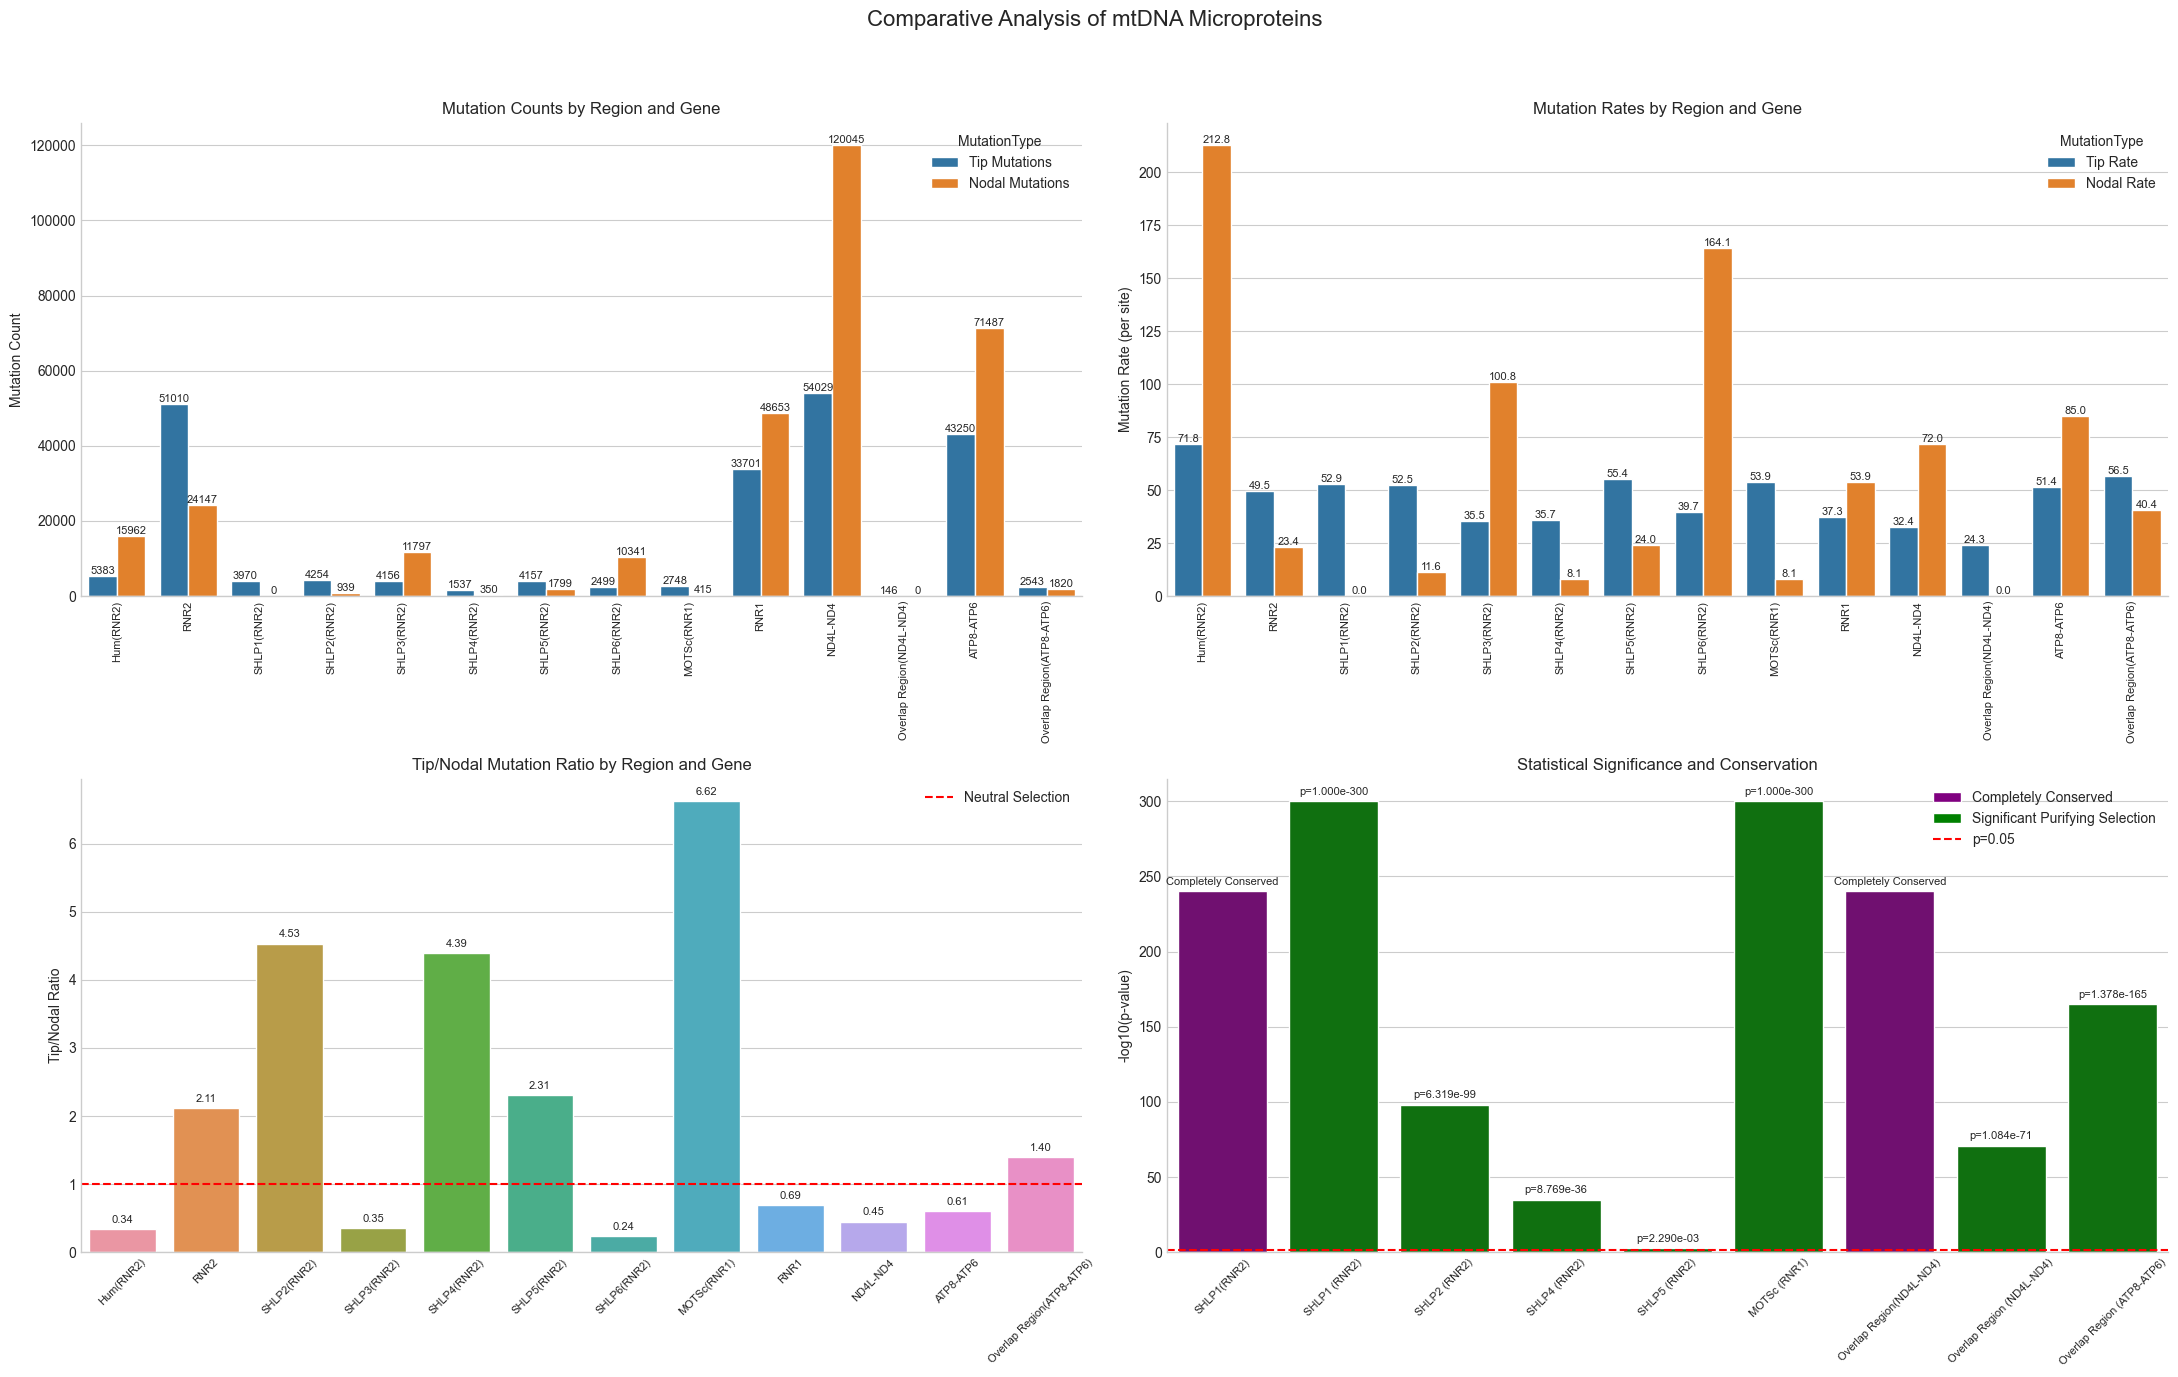

In [ ]:

reload(mmpa)

combined_results = mmpa.visualize_combined_results(
    results_list=[results_rnr2, results_rnr1, results_nd4L_nd4, results_atp8],
    gene_names=['RNR2', 'RNR1', 'ND4L-ND4', 'ATP8-ATP6'],
    regions_to_exclude=['rRNA'],  # Optionally exclude rRNA regions
    output_file=os.path.join(PATH, 'figures', 'combined_microprotein_analysis.png'),
    title='Comparative Analysis of mtDNA Microproteins',
    figsize = (22, 14),
)

In [ ]:
# Save combined results statistics to CSV
combined_results['statistics'].to_csv(os.path.join(PATH, 'data', 'combined_microprotein_analysis_statistics.csv'), index=False)
# Save combined results to CSV
combined_results['summary'].to_csv(os.path.join(PATH, 'data', 'combined_microprotein_analysis_summary.csv'), index=False)

